In [1]:
import sys  
sys.path.insert(0, '..')
from AT_funs import *

In [2]:
filename = 'MAIRE.MI.csv'
df = read_csv(filename)
ticker = filename.replace('csv', '')

filename_bm = 'FTSE_MIB.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

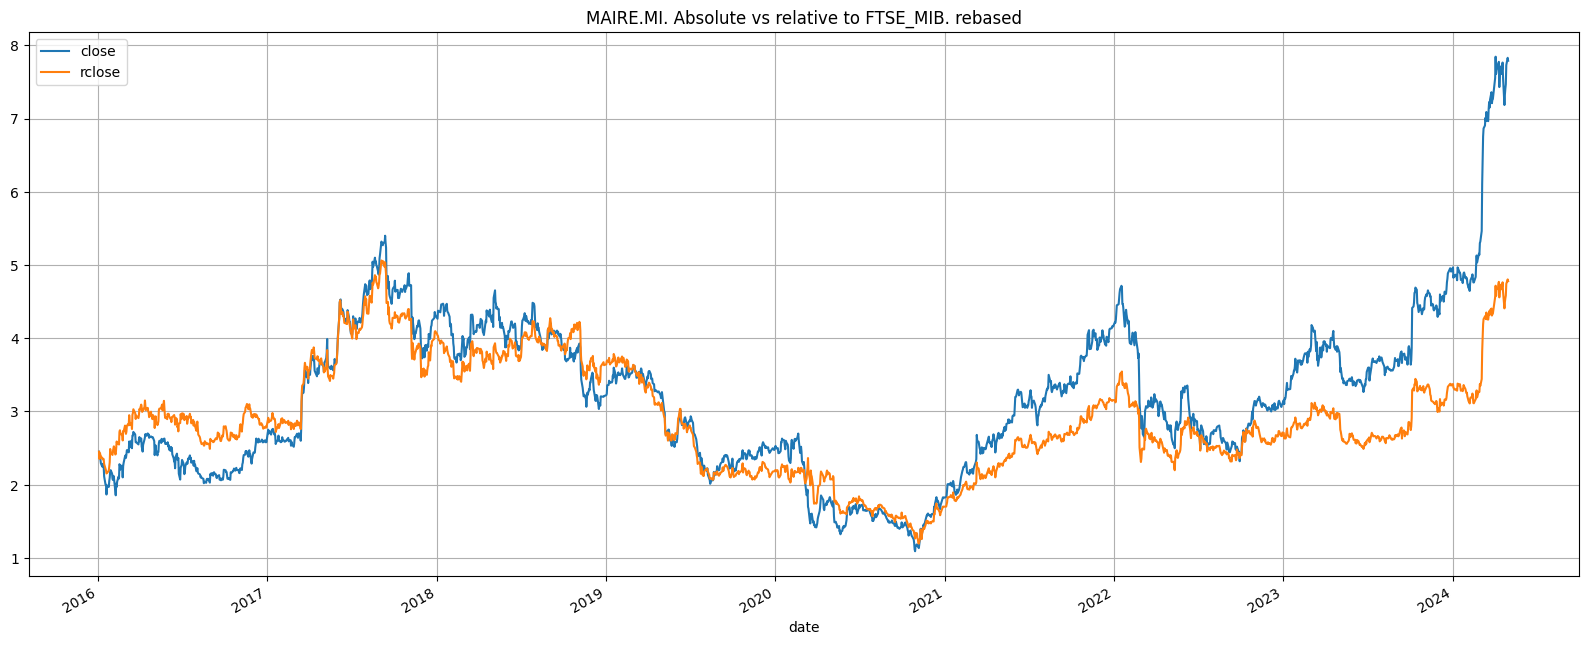

In [3]:
plot_abs_rel(df, ticker, bm_df, bm_name)

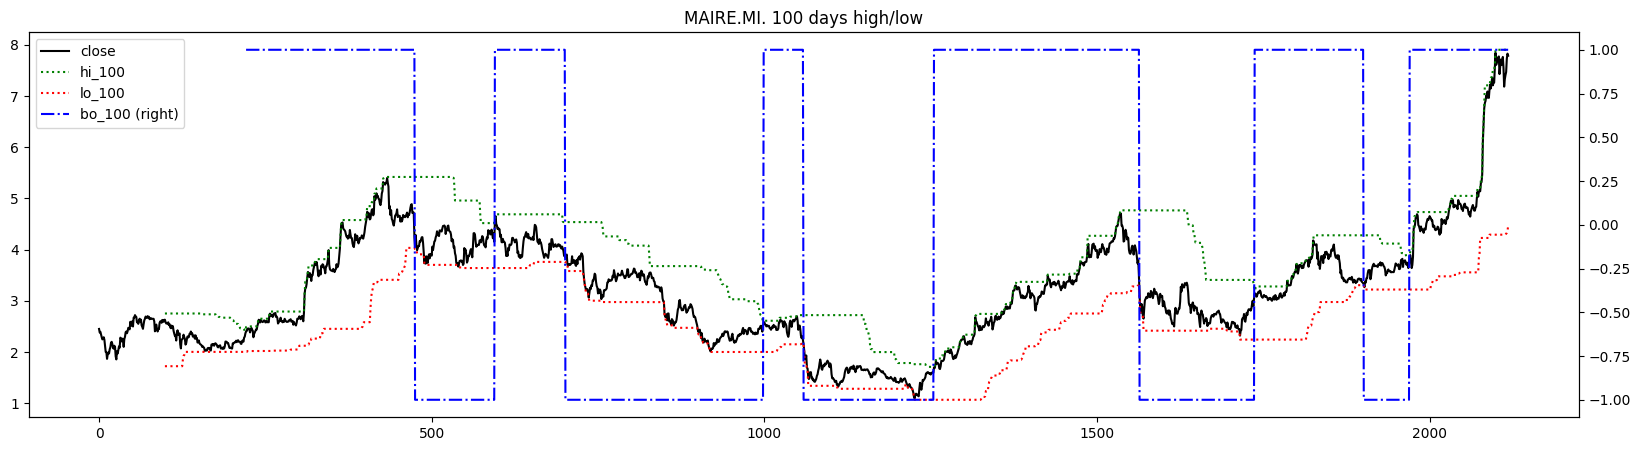

In [4]:
window_bo = 100
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

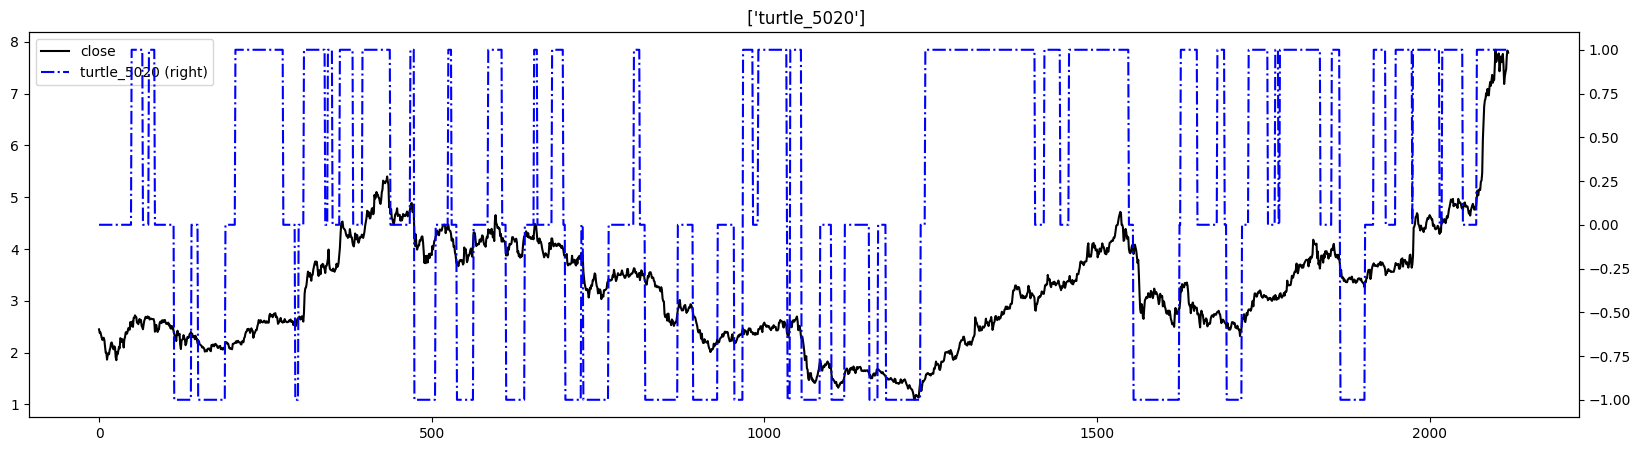

In [5]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

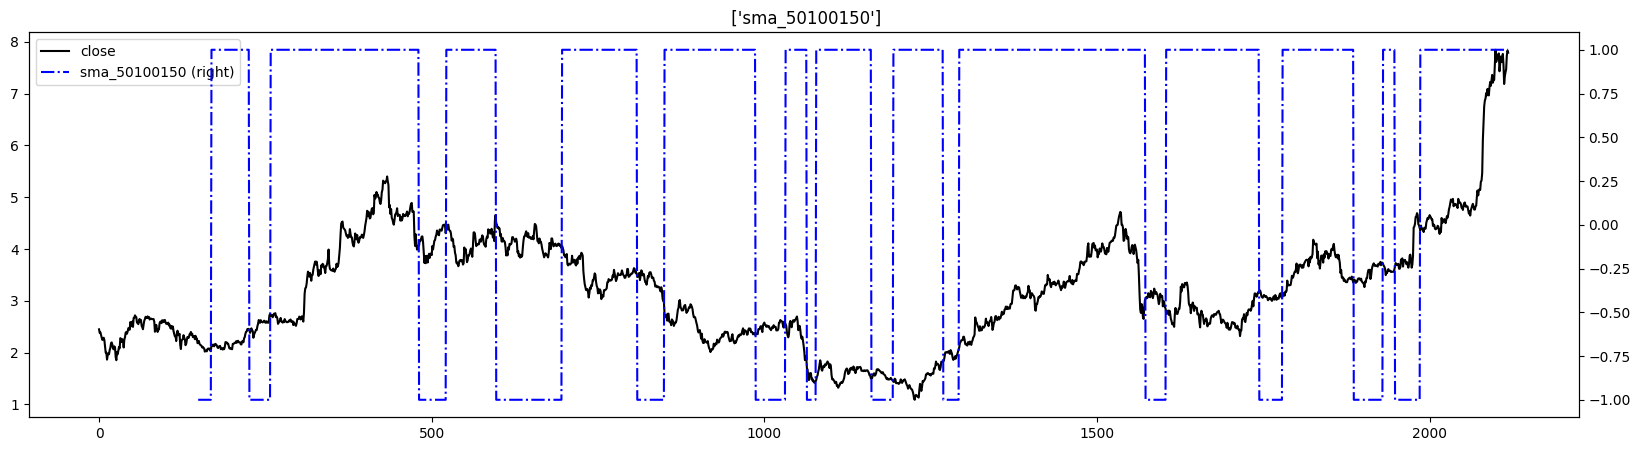

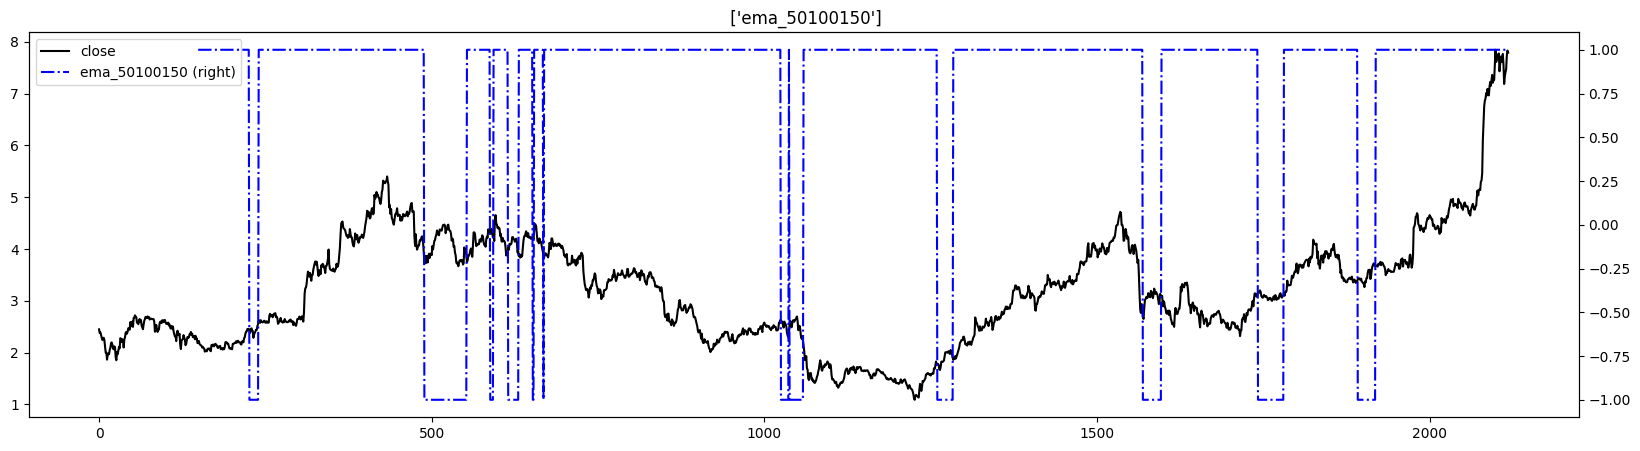

In [6]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

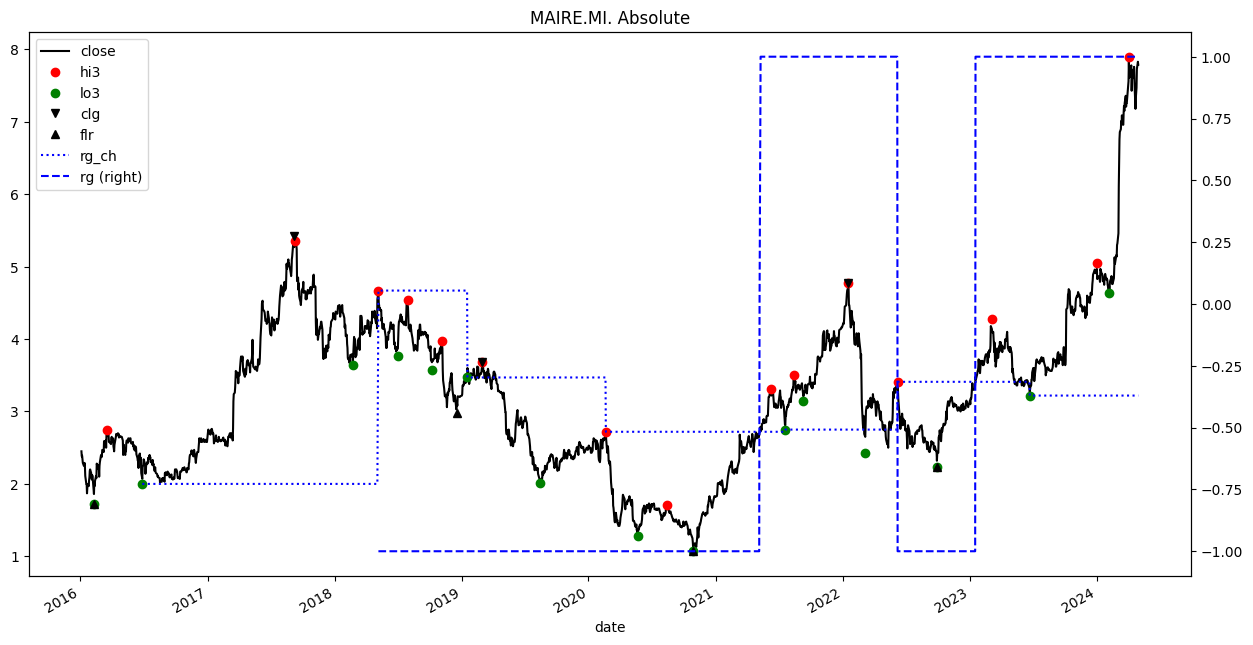

In [7]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


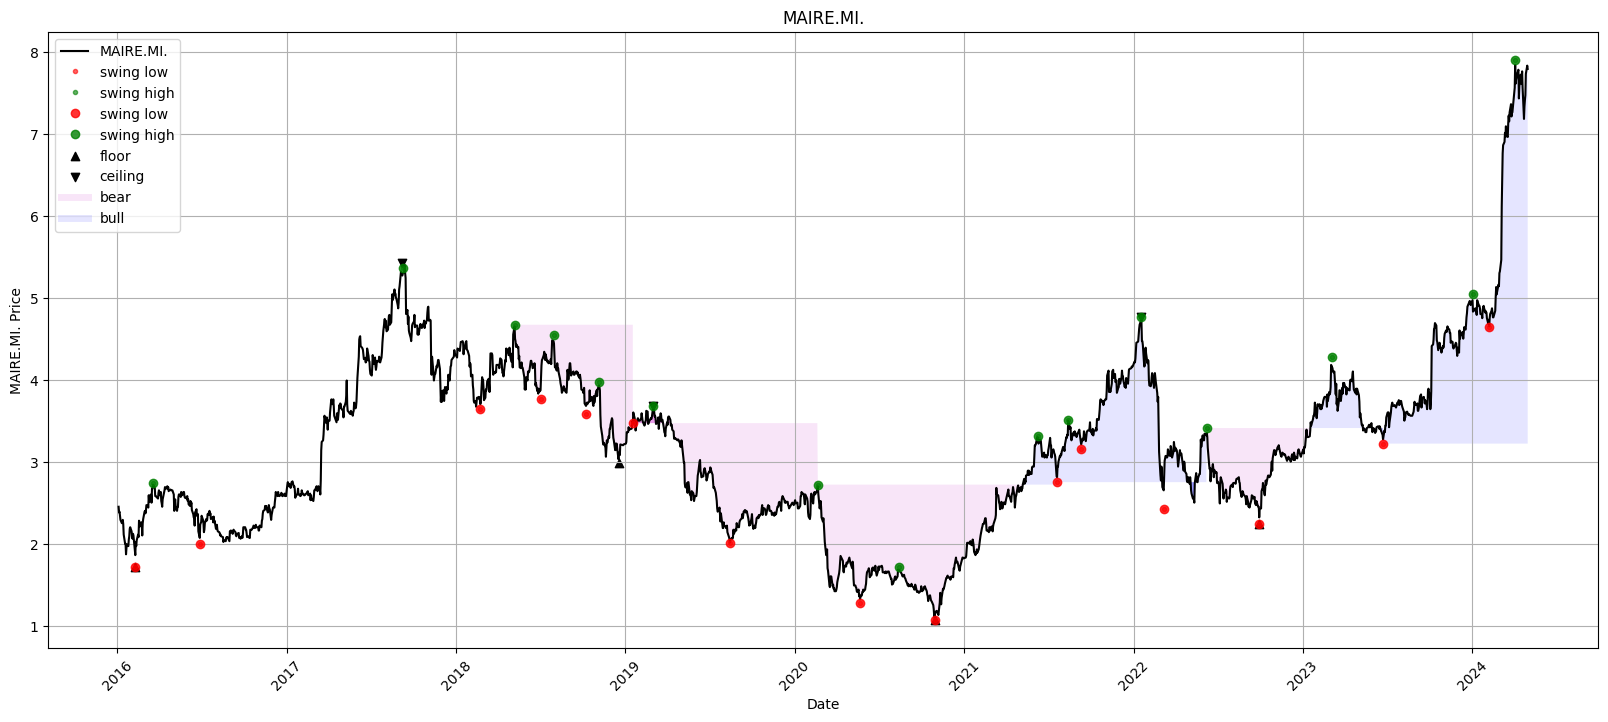

In [8]:
plot_regime_abs(df_fc, ticker)

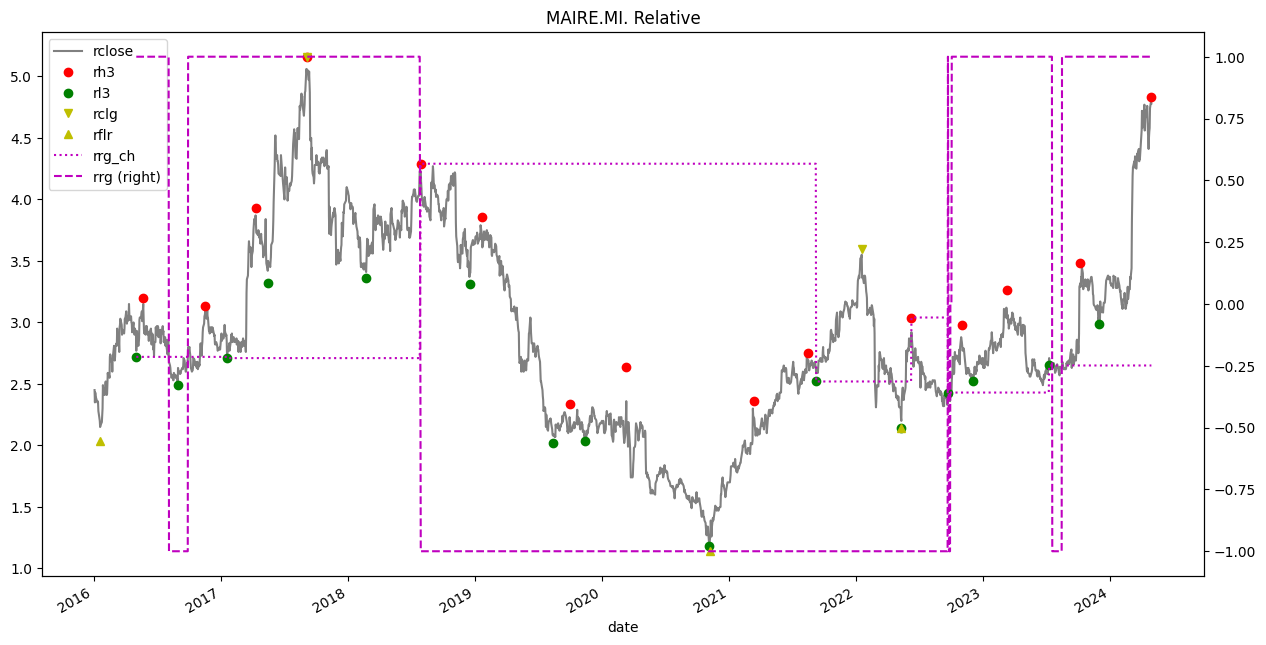

In [9]:
plot_signal_rel(df_fc, ticker)

1
1


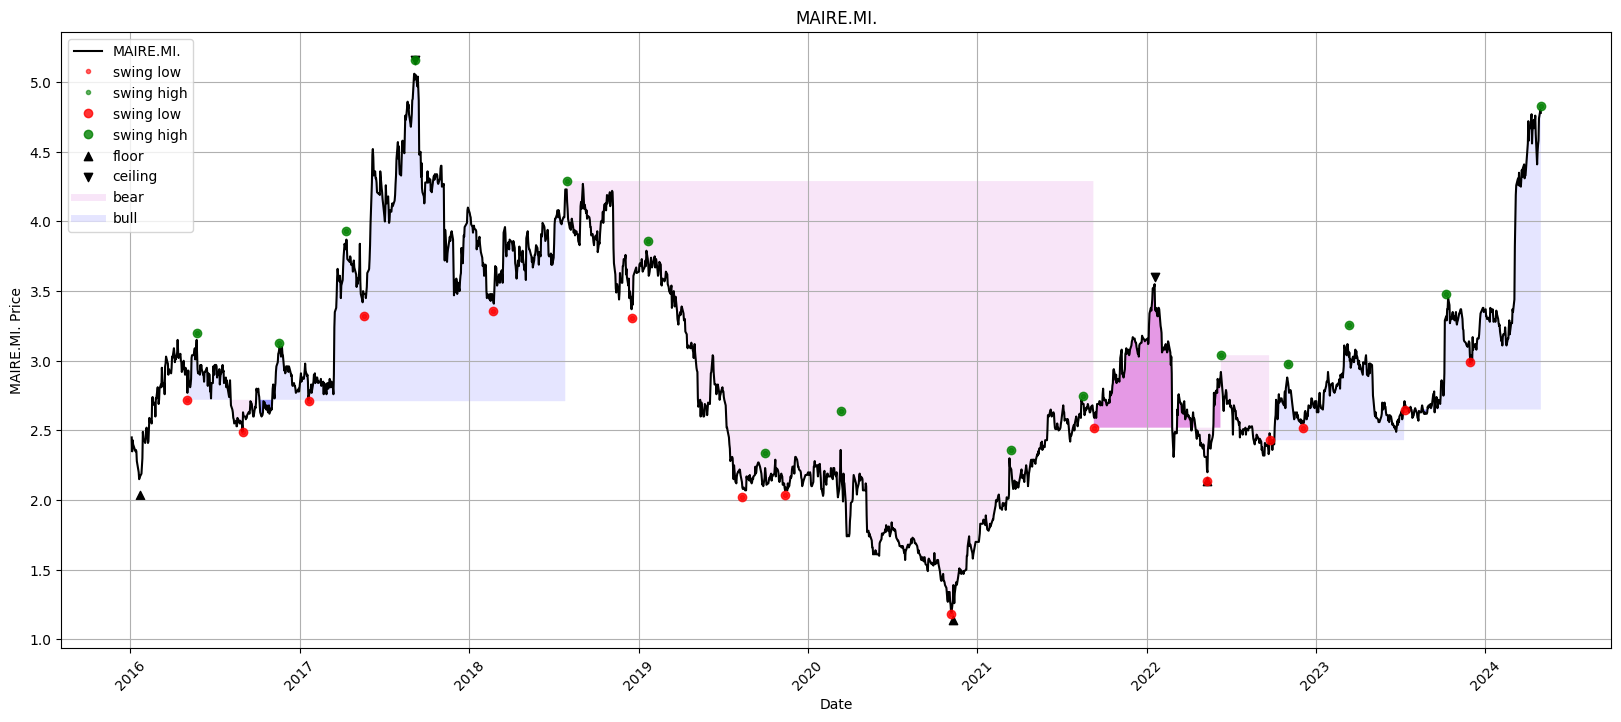

In [10]:
plot_regime_rel(df_fc, ticker)

In [11]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [12]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [13]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [14]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                 7.79       7.08  5.708746
ema                      7.79       7.08  2.429058
floor_ceiling            7.79       7.08  3.423321
floor_ceiling_relative   7.79       7.08  8.763788
sma                      7.79       7.08  2.599431
turtle                   7.79       7.08  2.702252

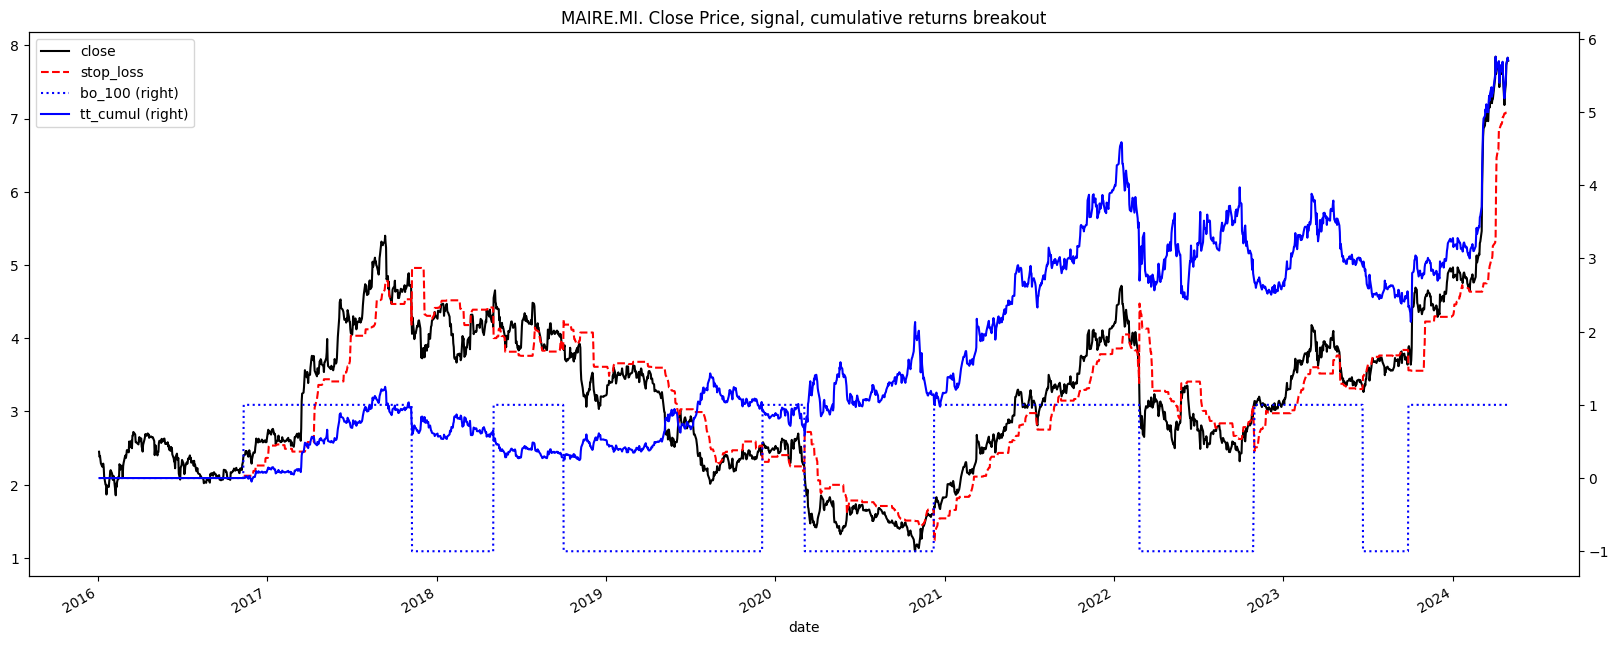

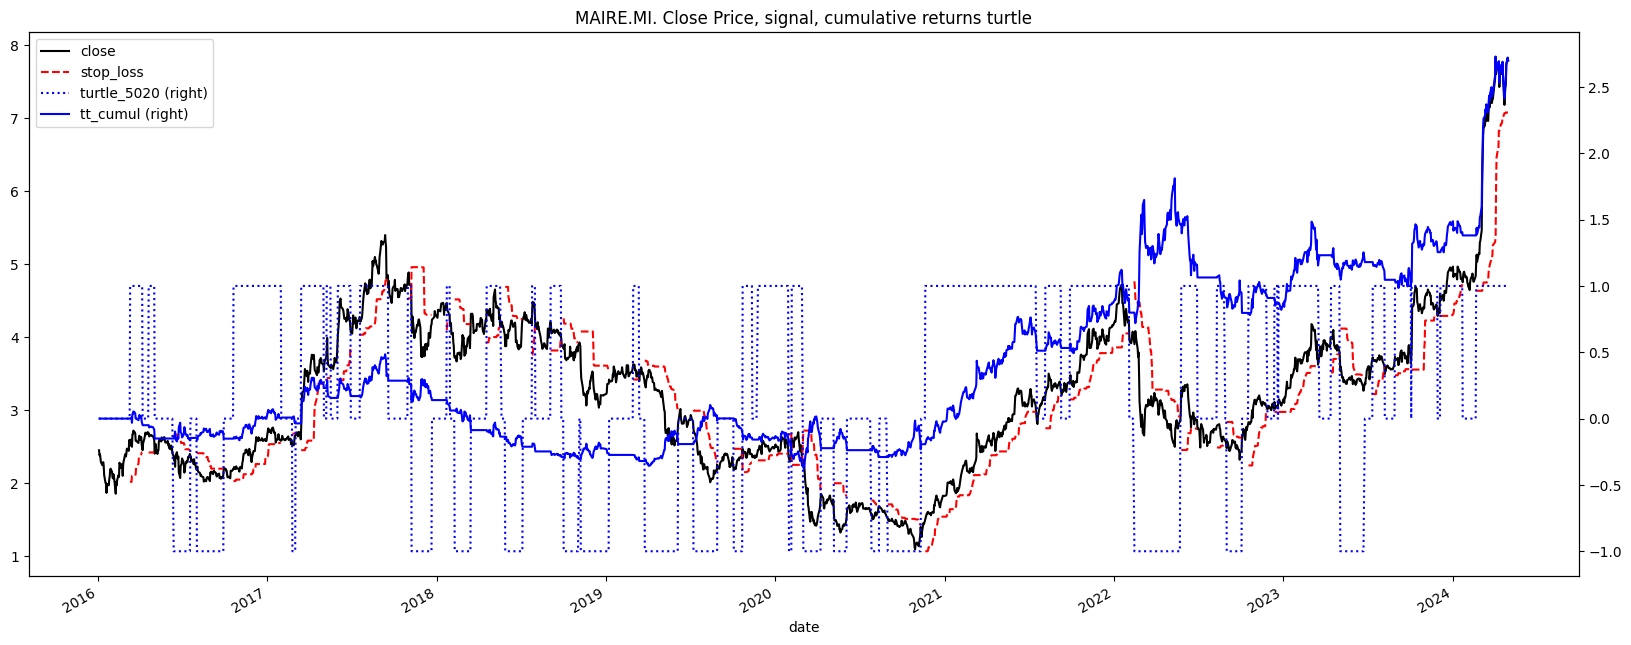

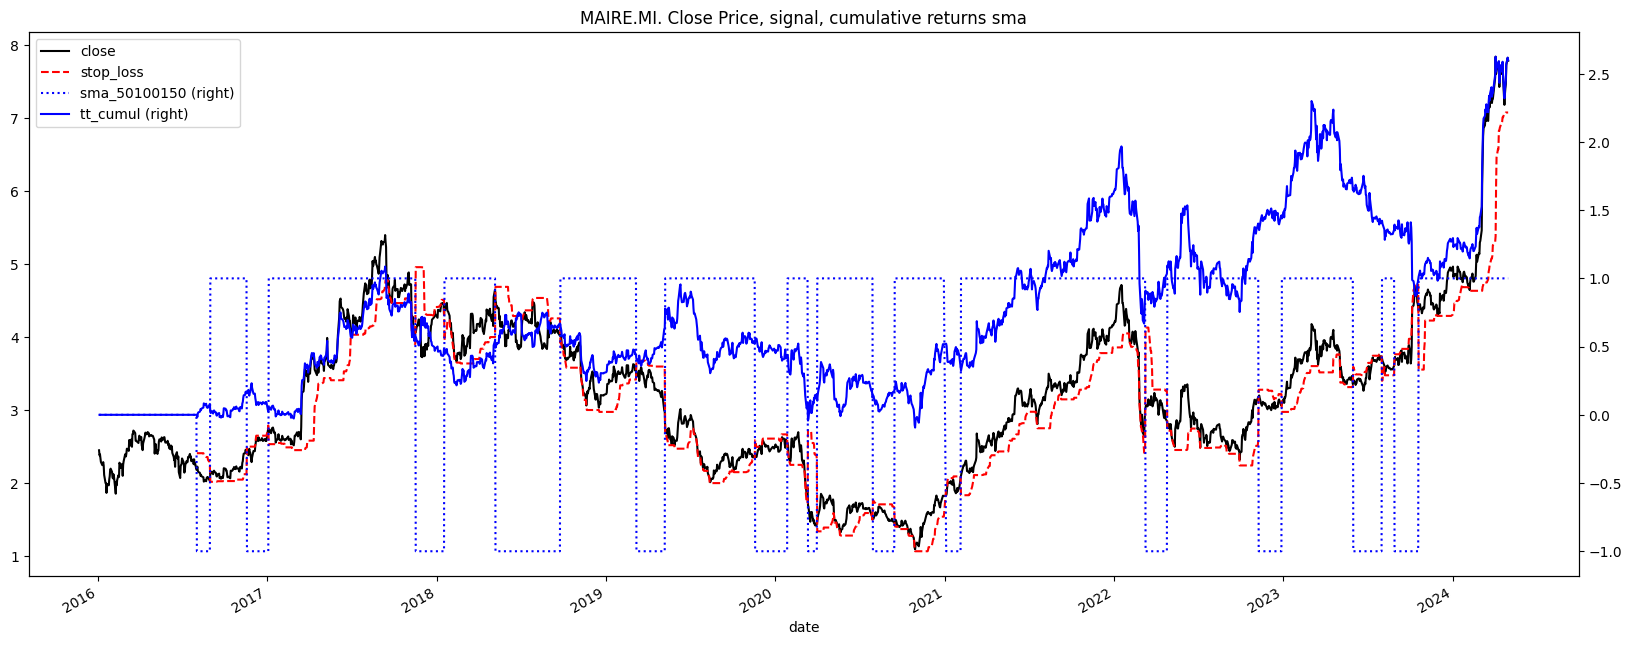

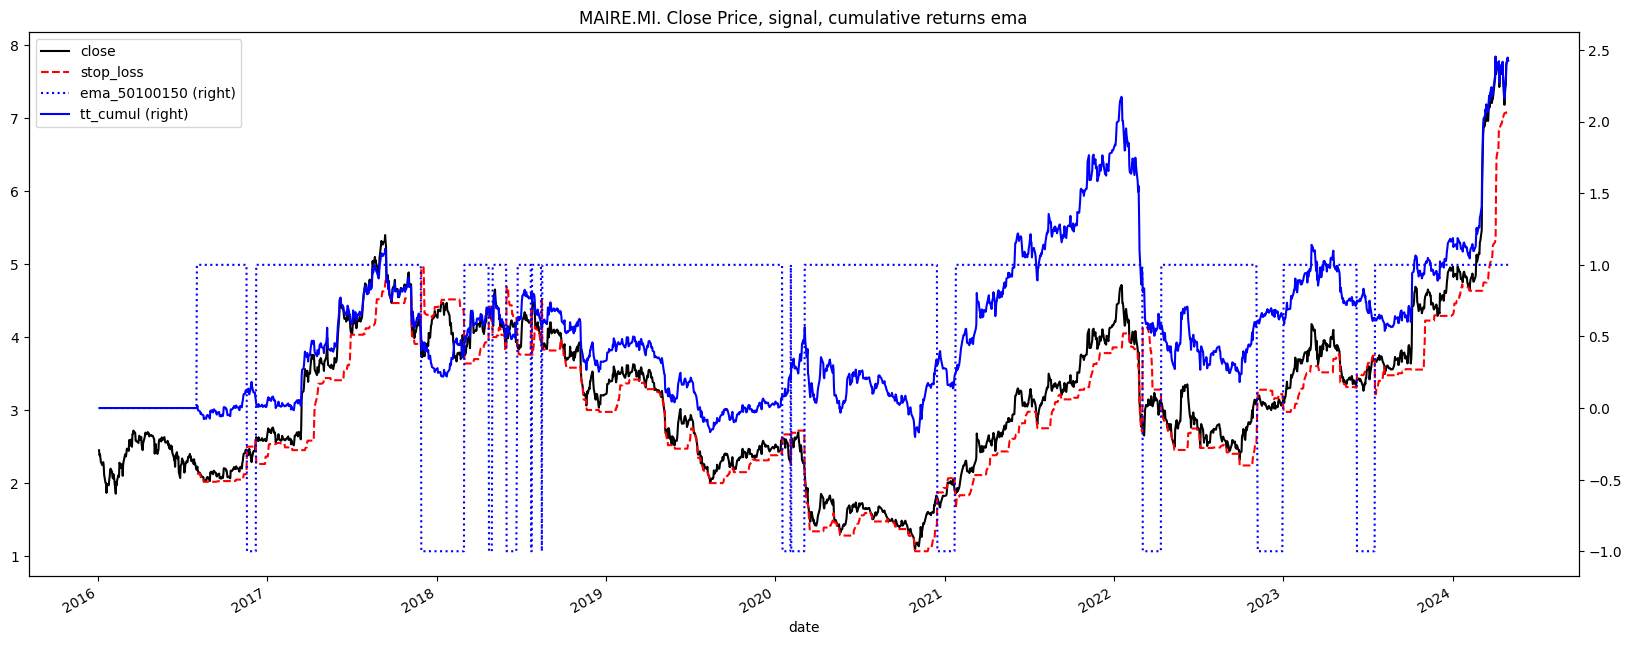

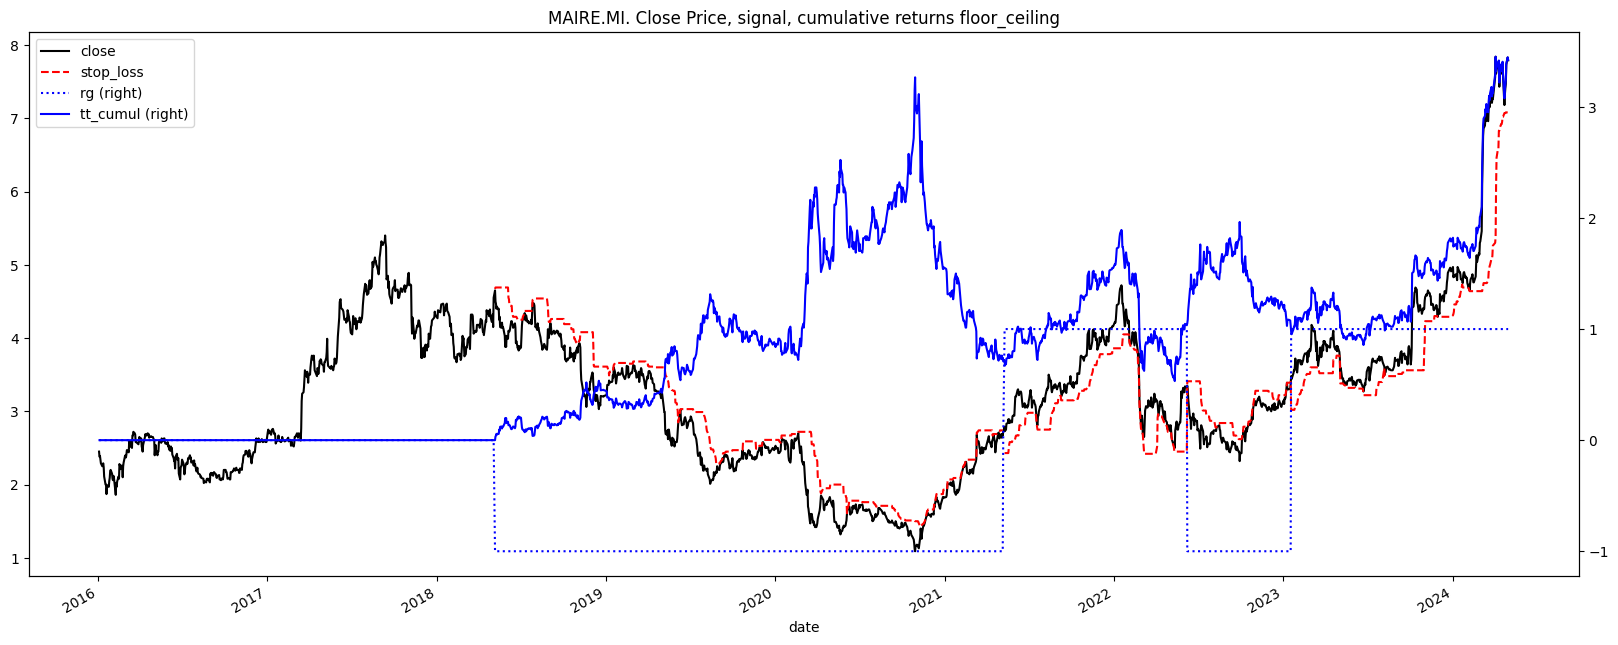

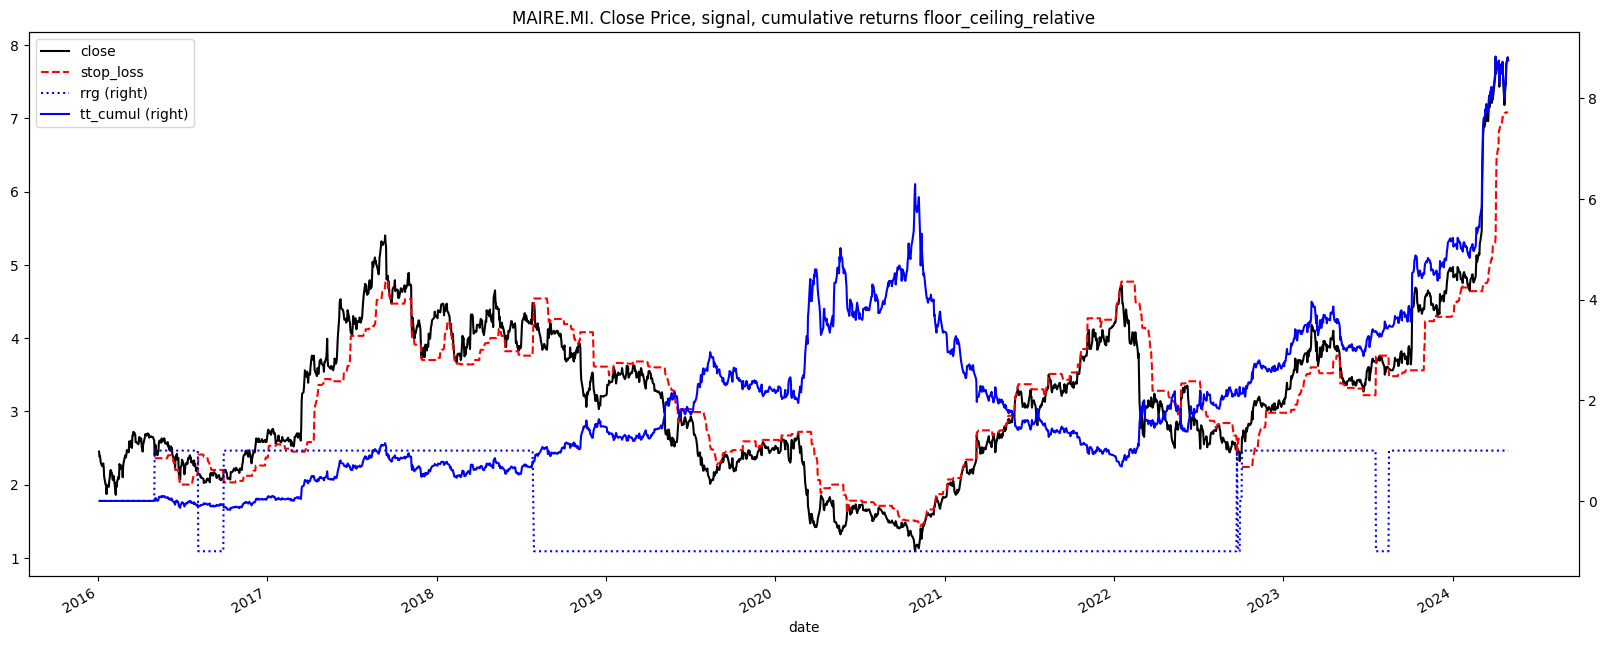

In [15]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

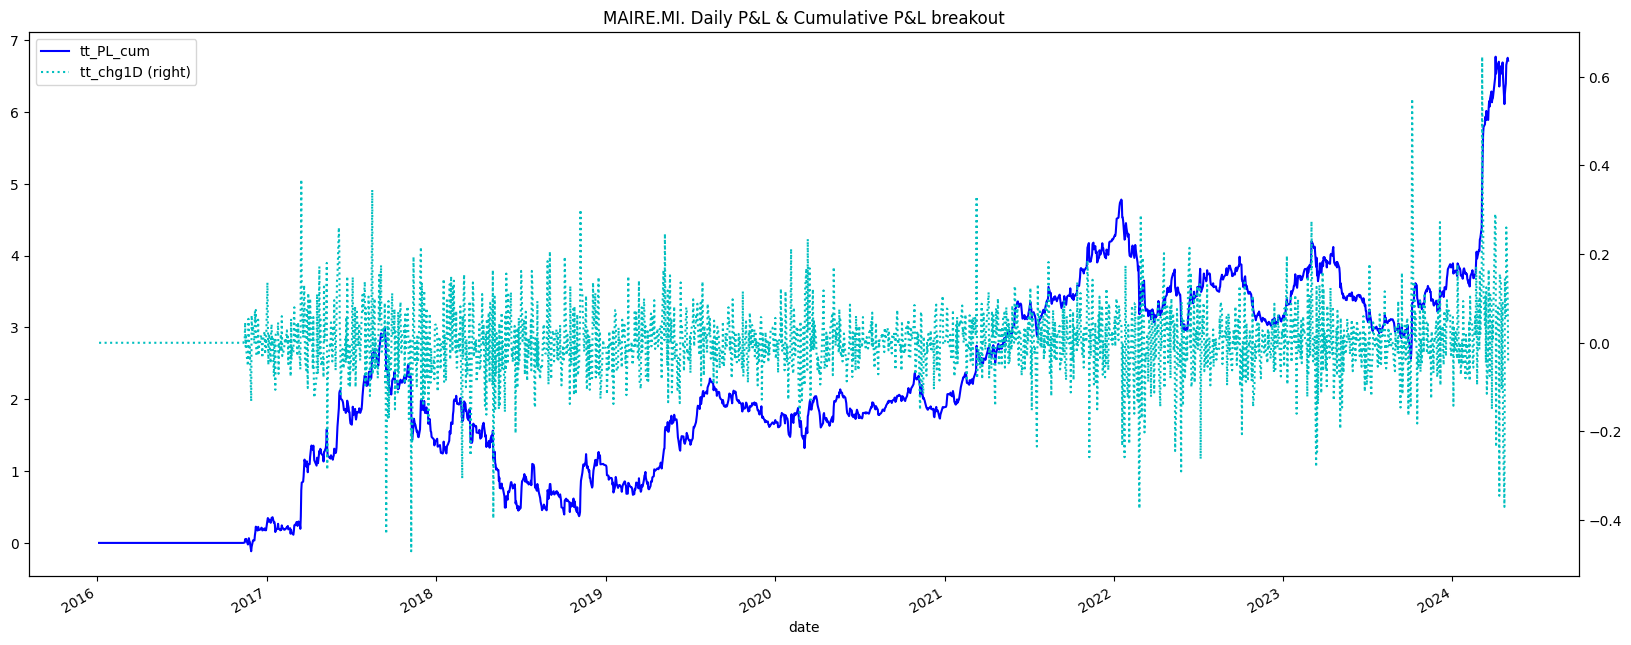

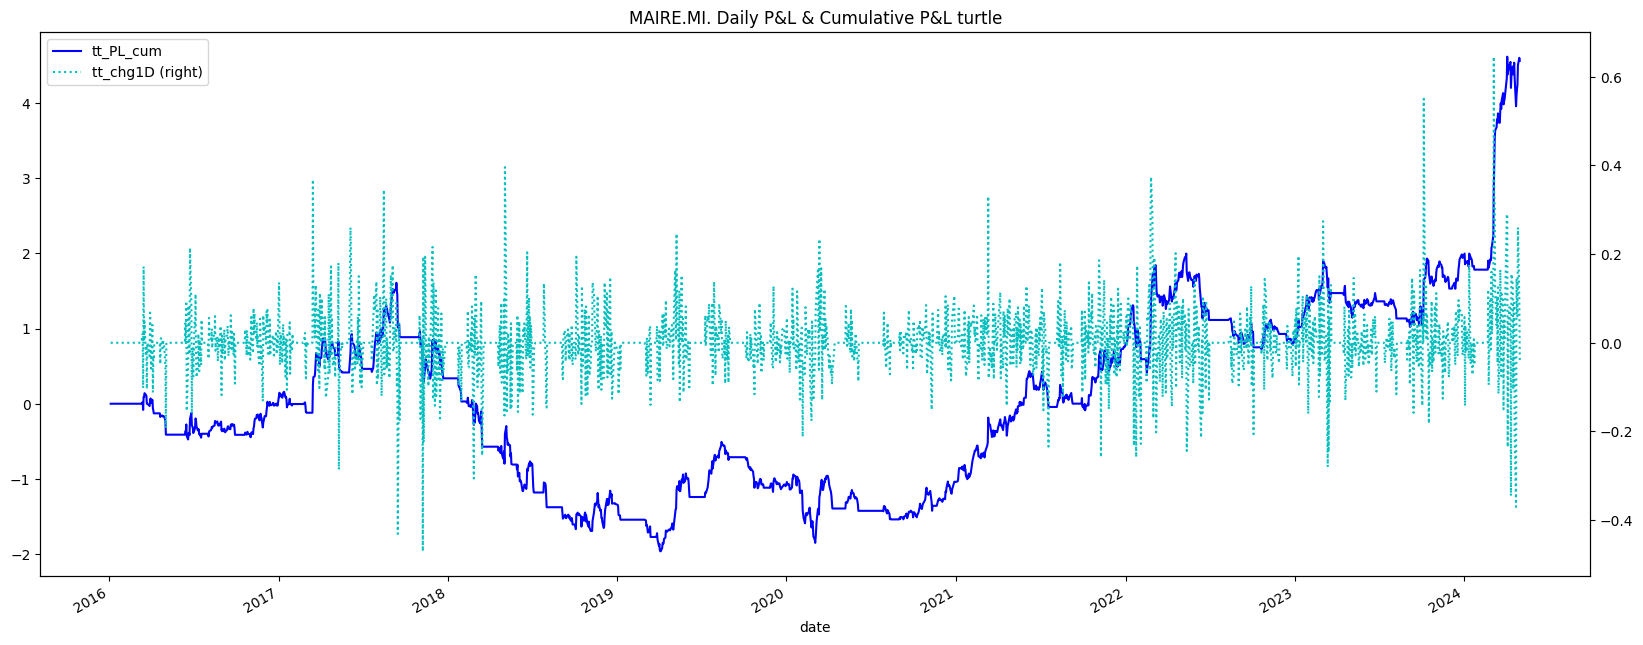

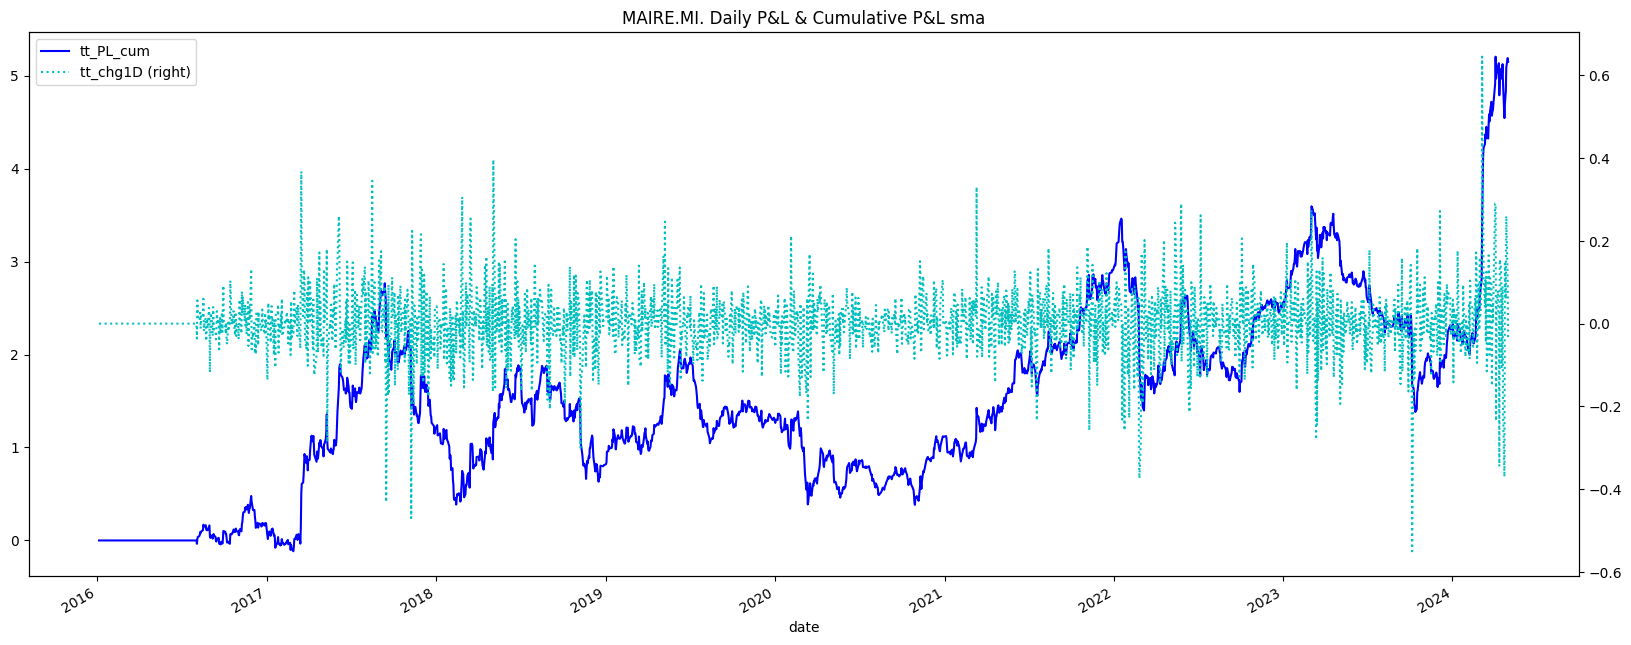

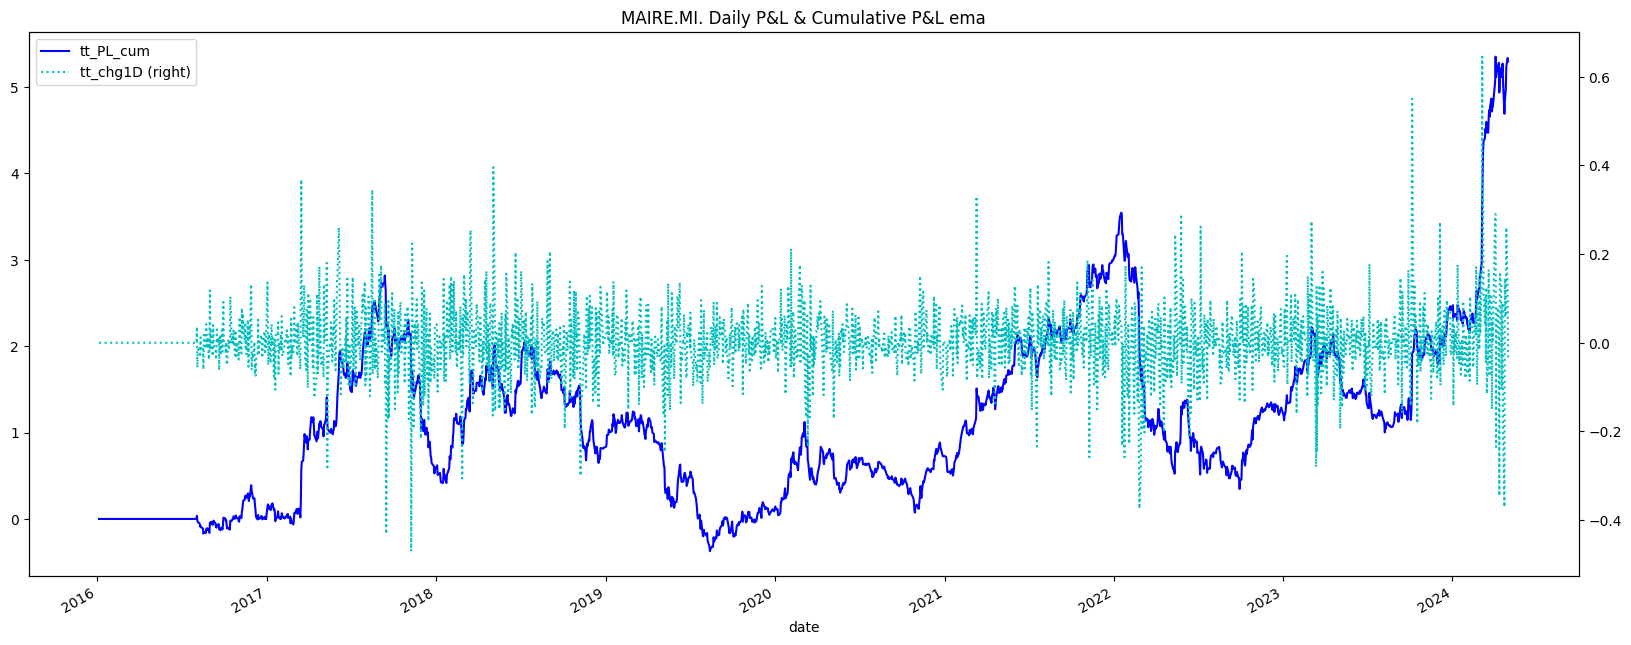

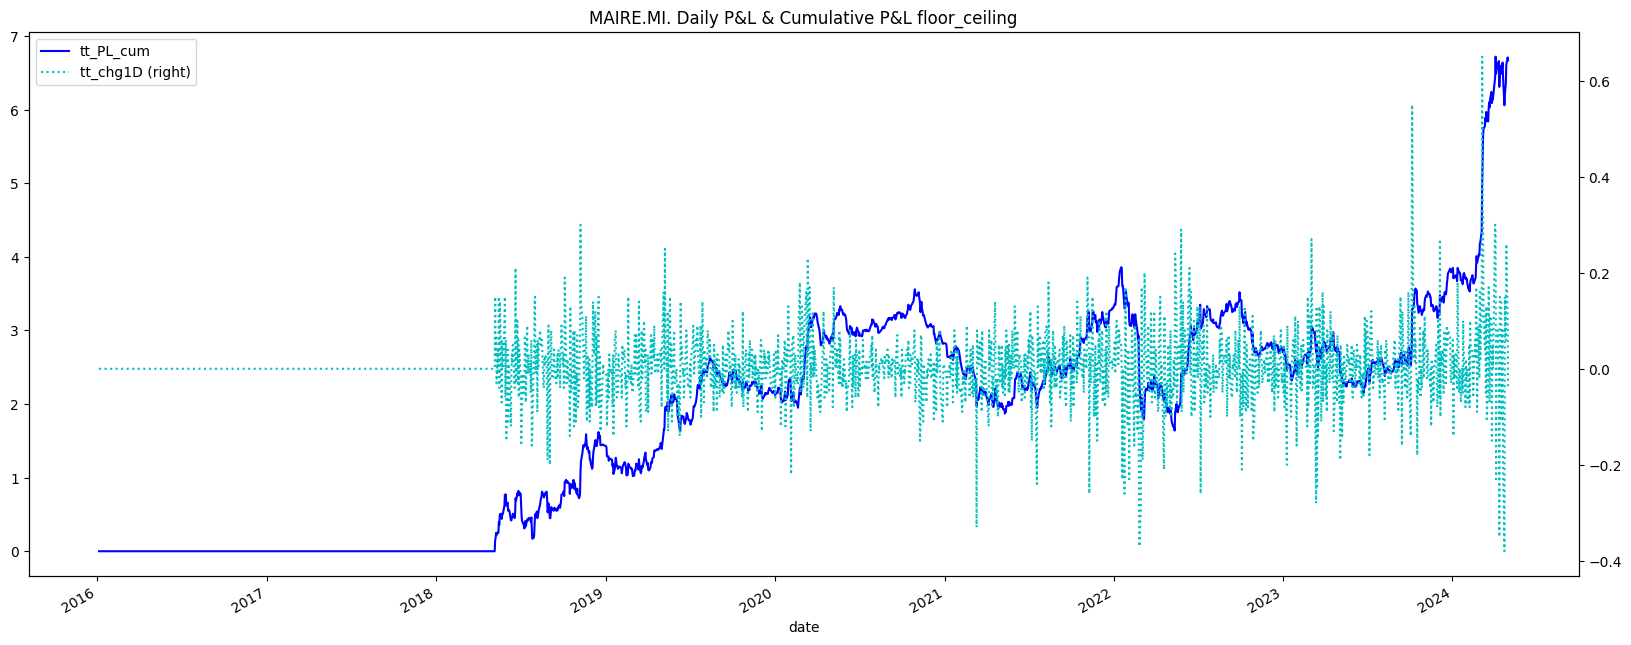

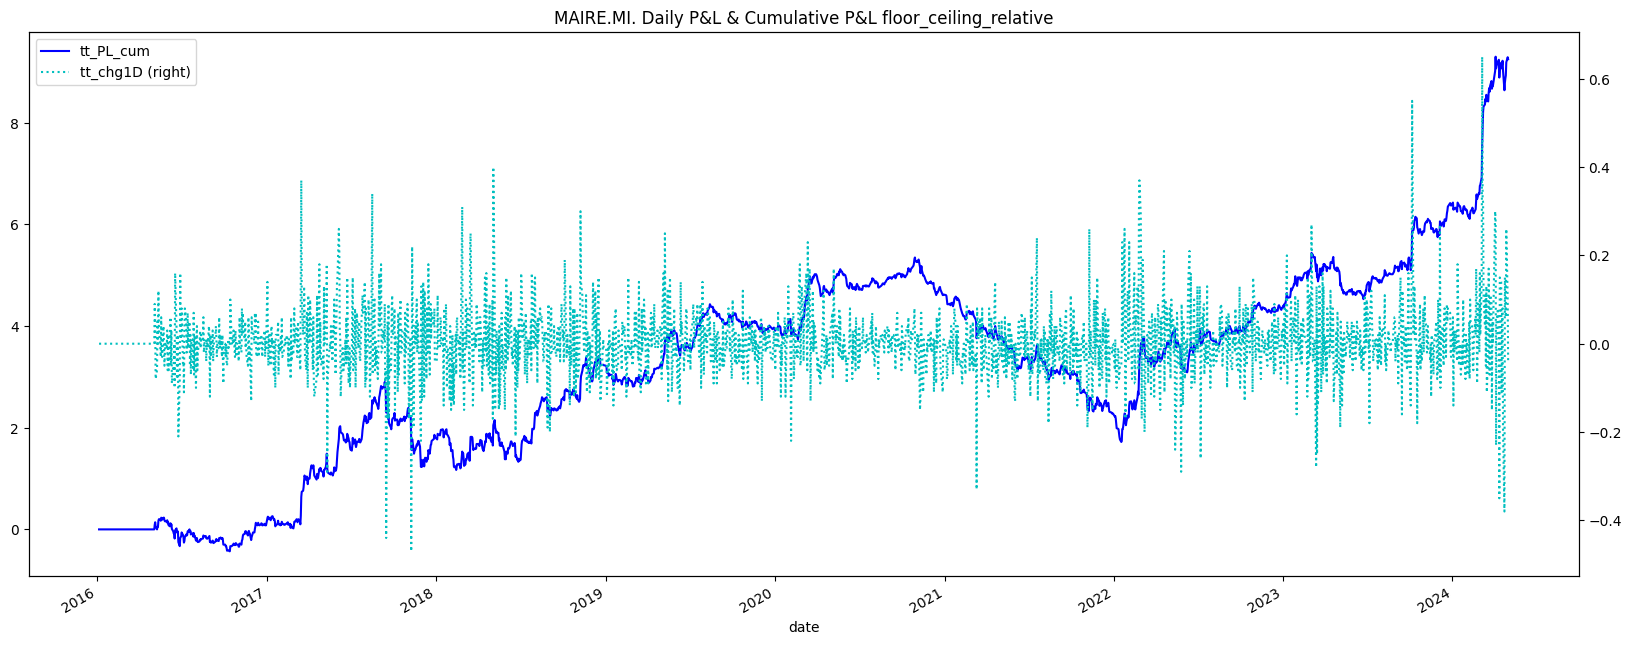

In [16]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [17]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy       kelly
method                                                                
breakout                    0.004590              0.004563   92.703458
ema                         0.004590              0.004563   92.703458
floor_ceiling               0.004747              0.004721   94.910848
floor_ceiling_relative      0.004747              0.004721   94.910848
sma                         0.004590              0.004563   92.703458
turtle                      0.005228              0.005212  159.057953

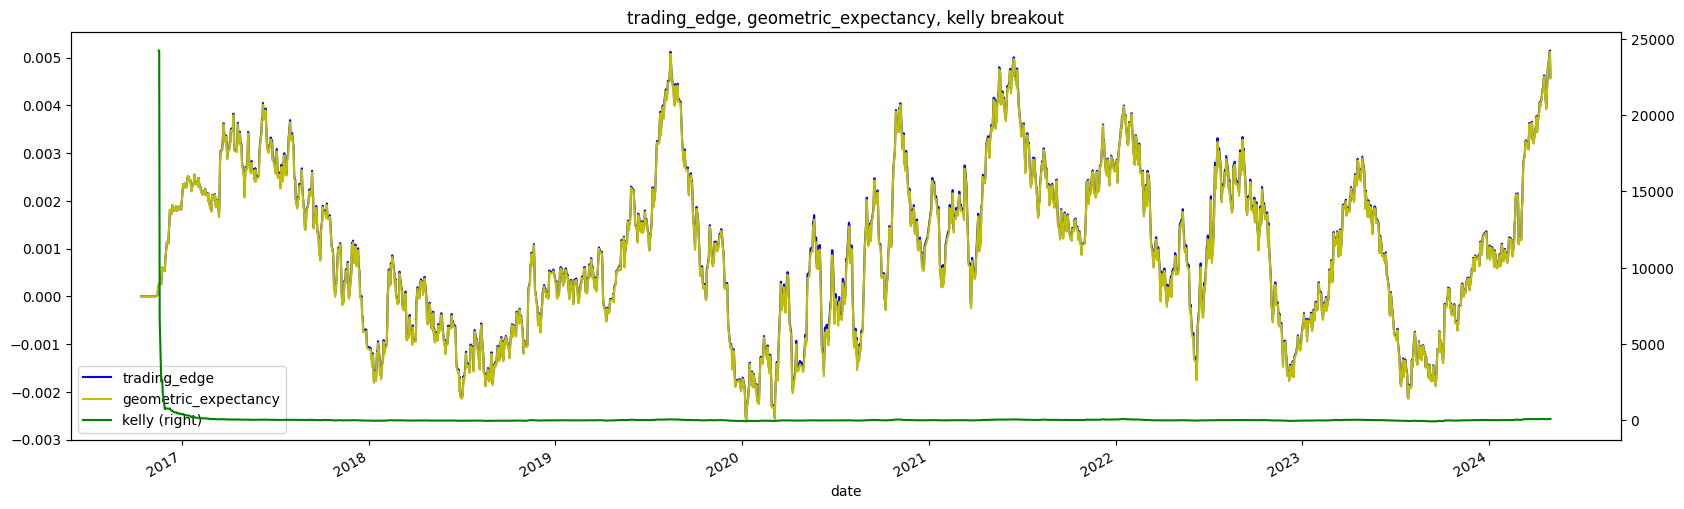

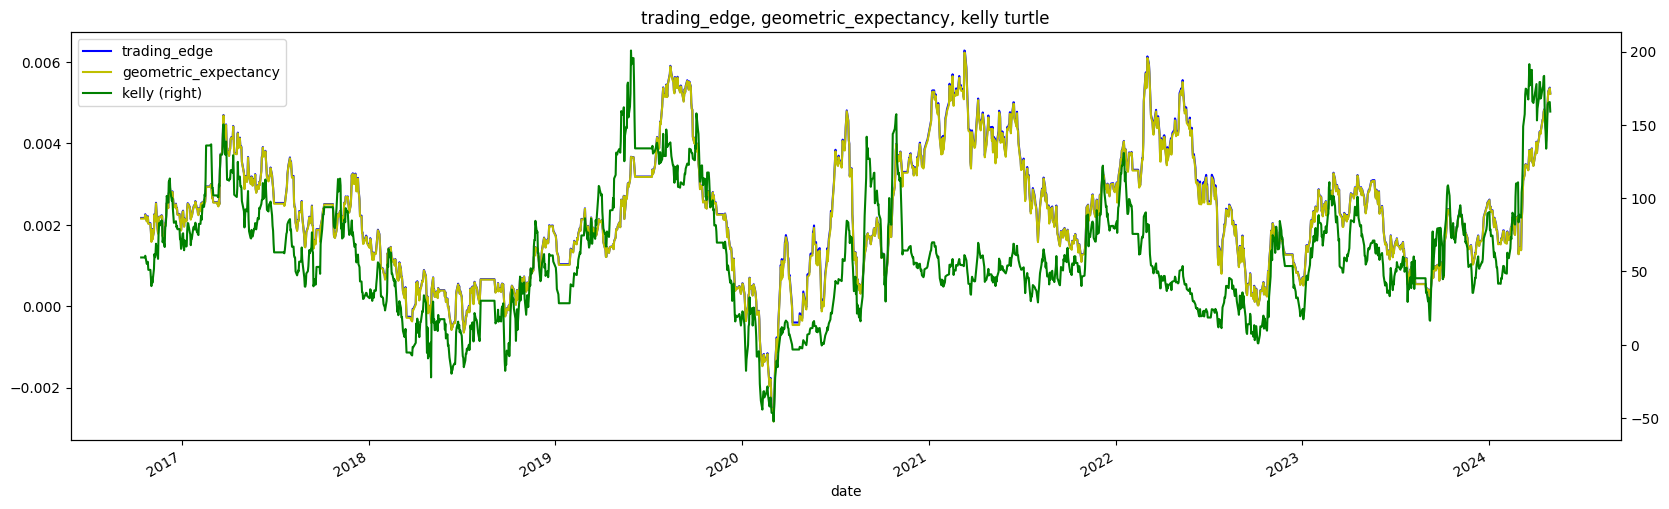

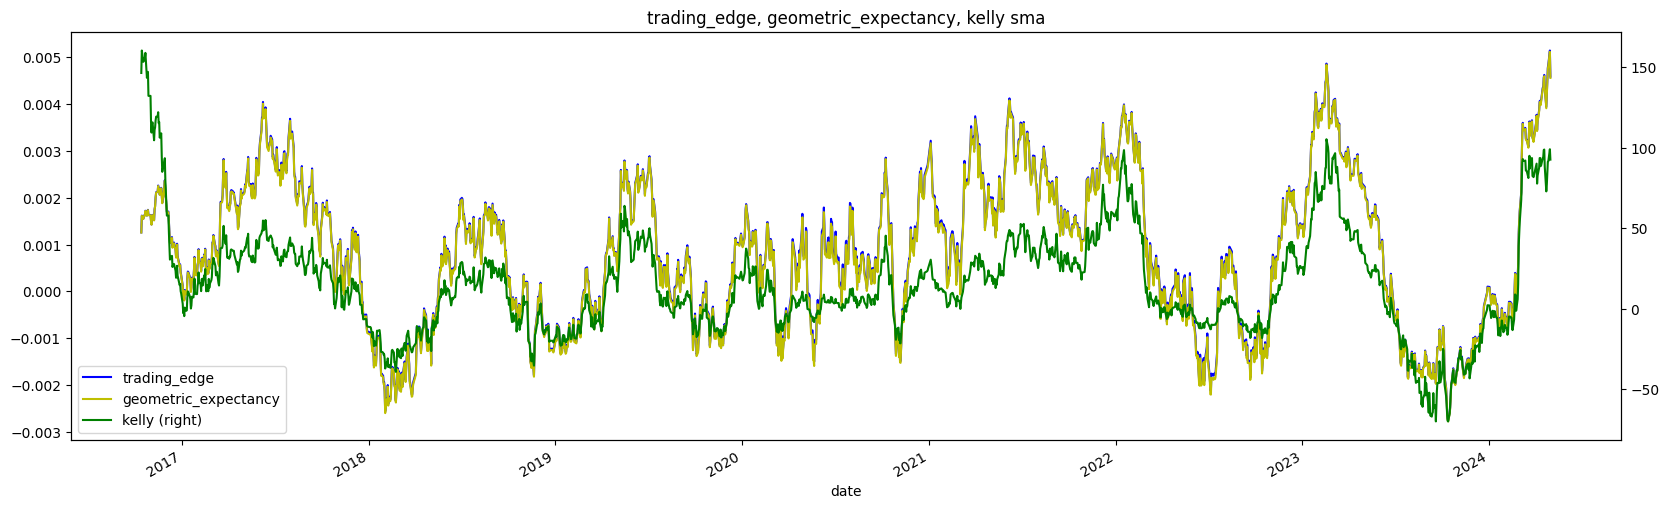

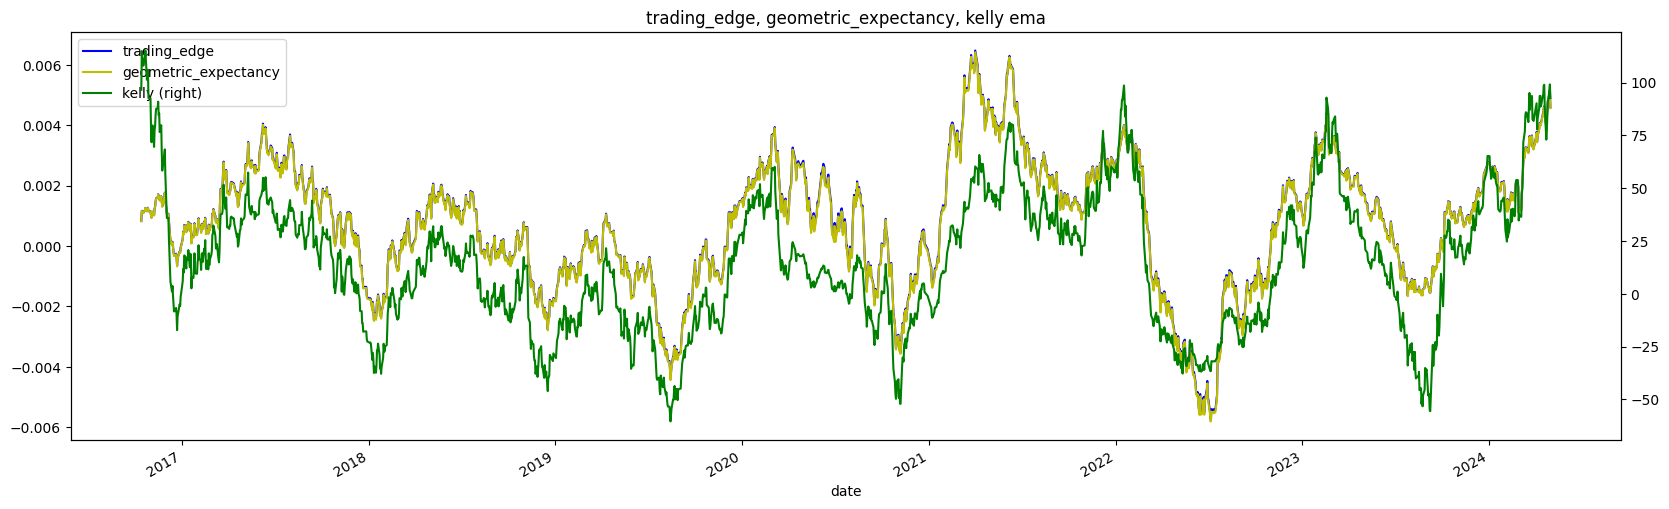

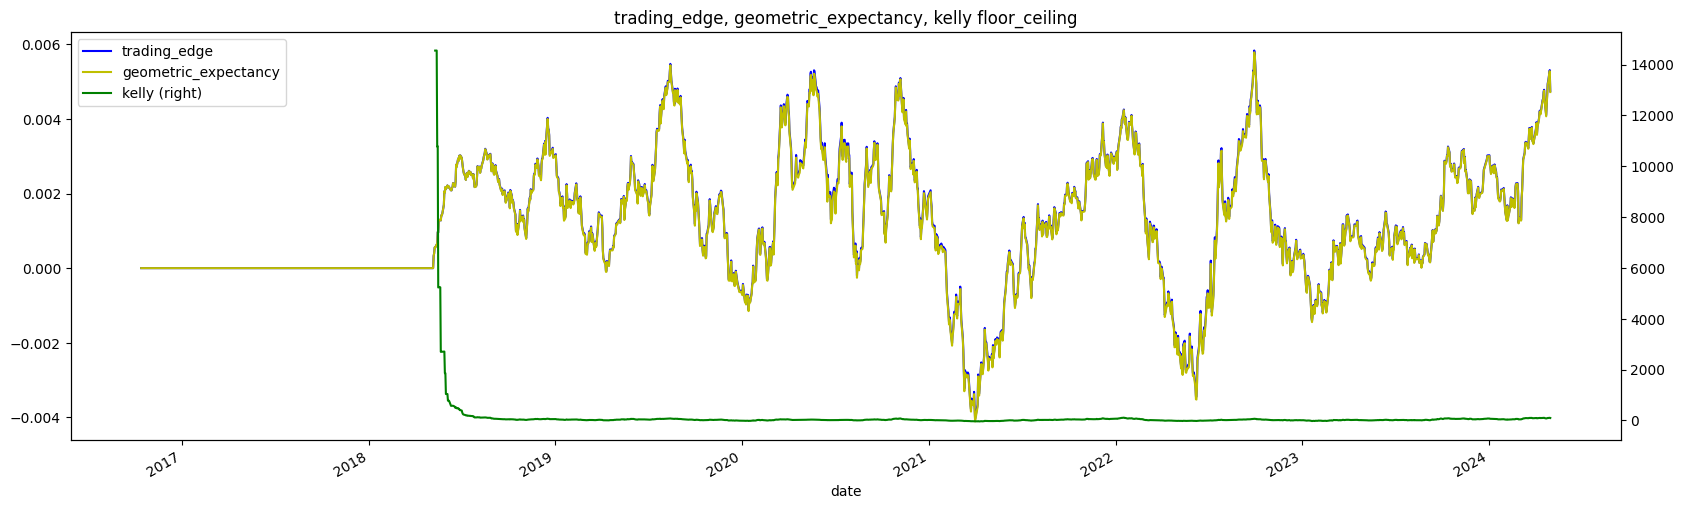

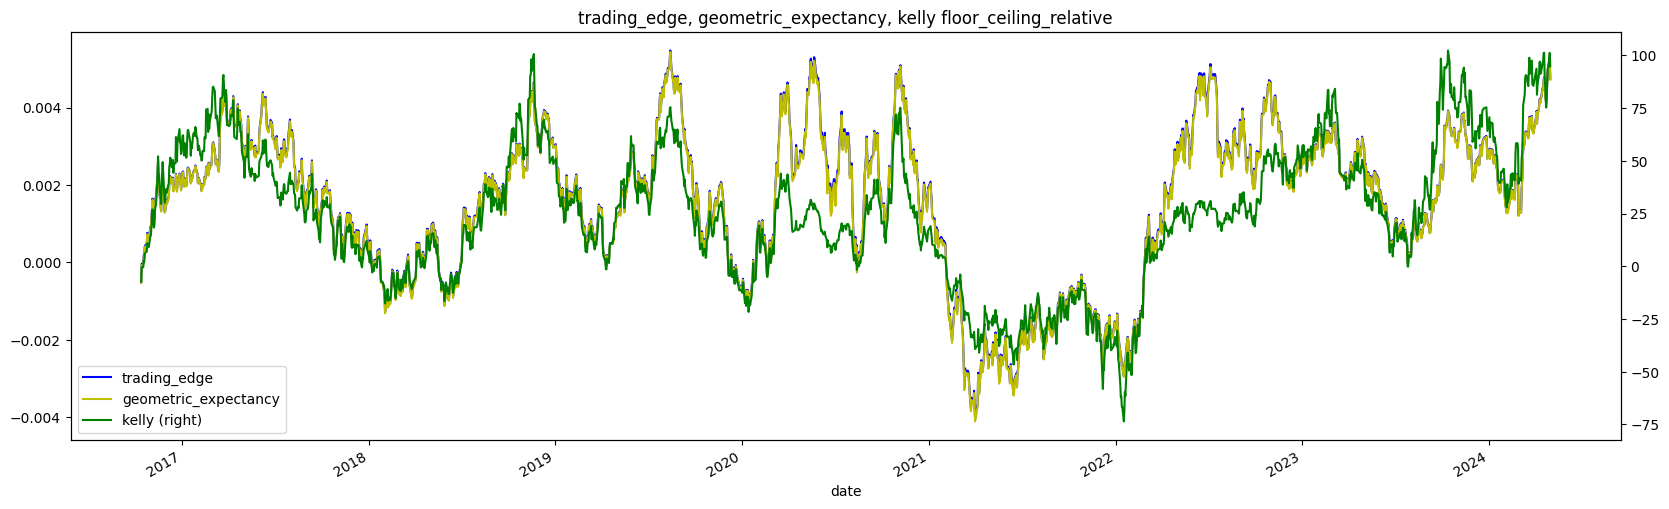

In [18]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [19]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [20]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [21]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [22]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant   concave    convex  equal_weight  \
method                                                               
breakout                111413.8  117456.4  117456.4      113428.0   
ema                     142368.0  163552.0  163552.0      111651.2   
floor_ceiling            54875.0   27906.0   27906.0      110462.0   
floor_ceiling_relative  157990.0  178280.0  178280.0      118500.0   
sma                      88159.6   81982.0   81982.0      111325.6   
turtle                  107188.5  109840.5  107147.6      108149.4   

                        tt_PL_cum_fx  
method                                
breakout                       6.714  
ema                            5.296  
floor_ceiling                  6.670  
floor_ceiling_relative         9.250  
sma                            5.148  
turtle                         4.565

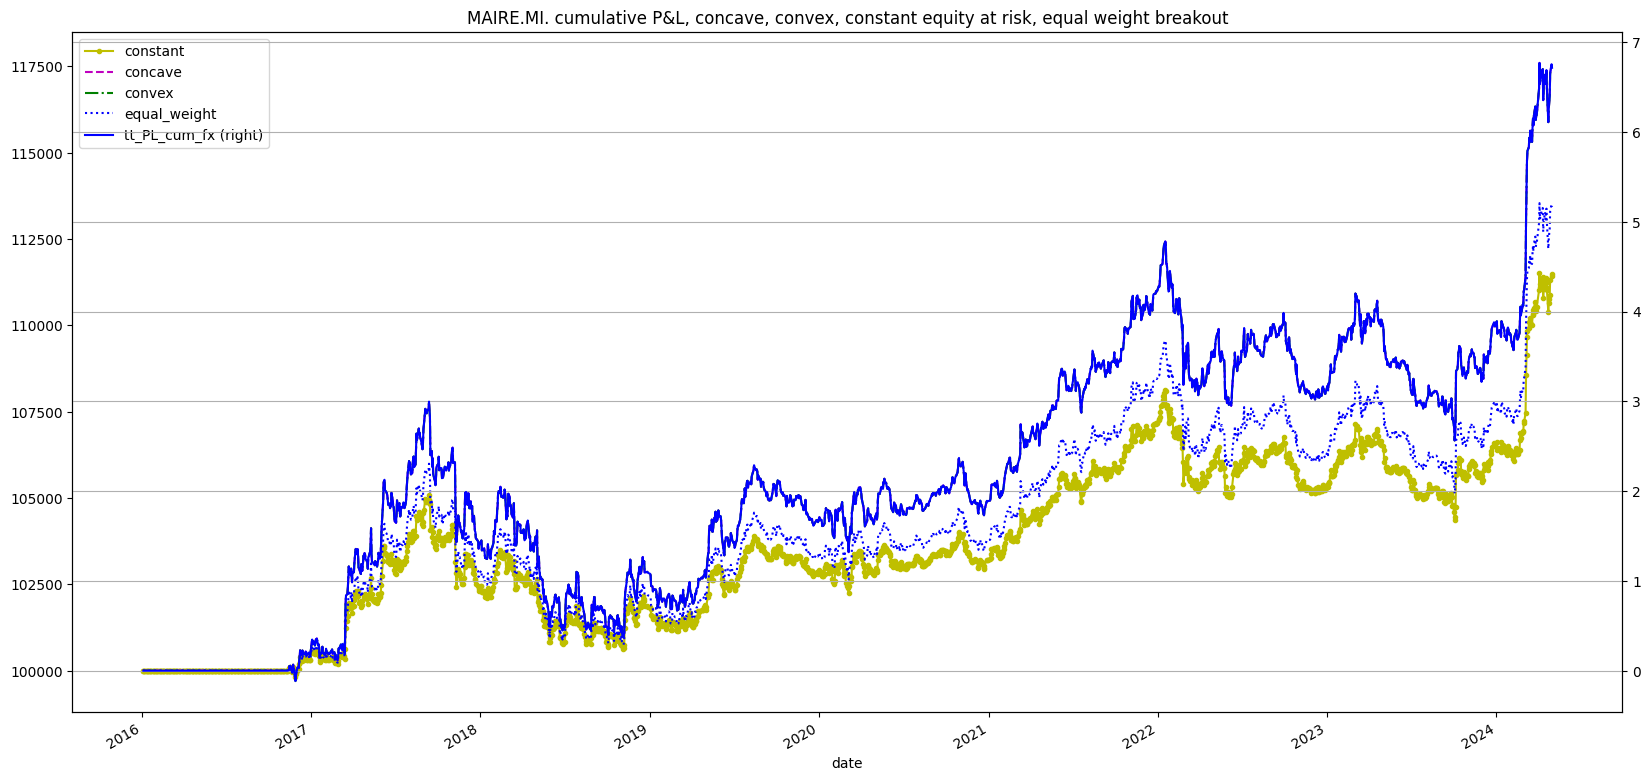

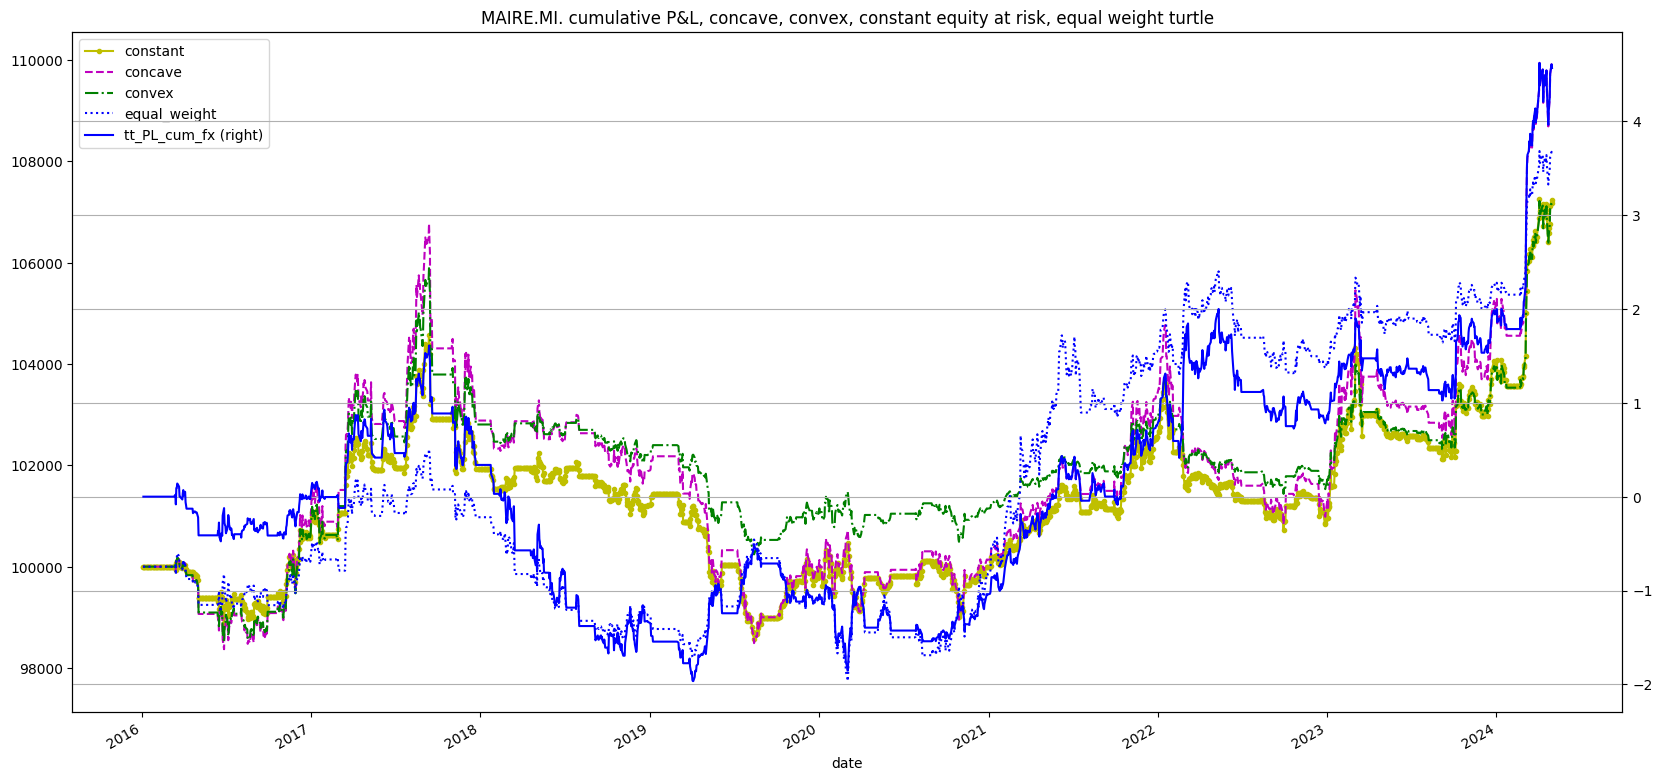

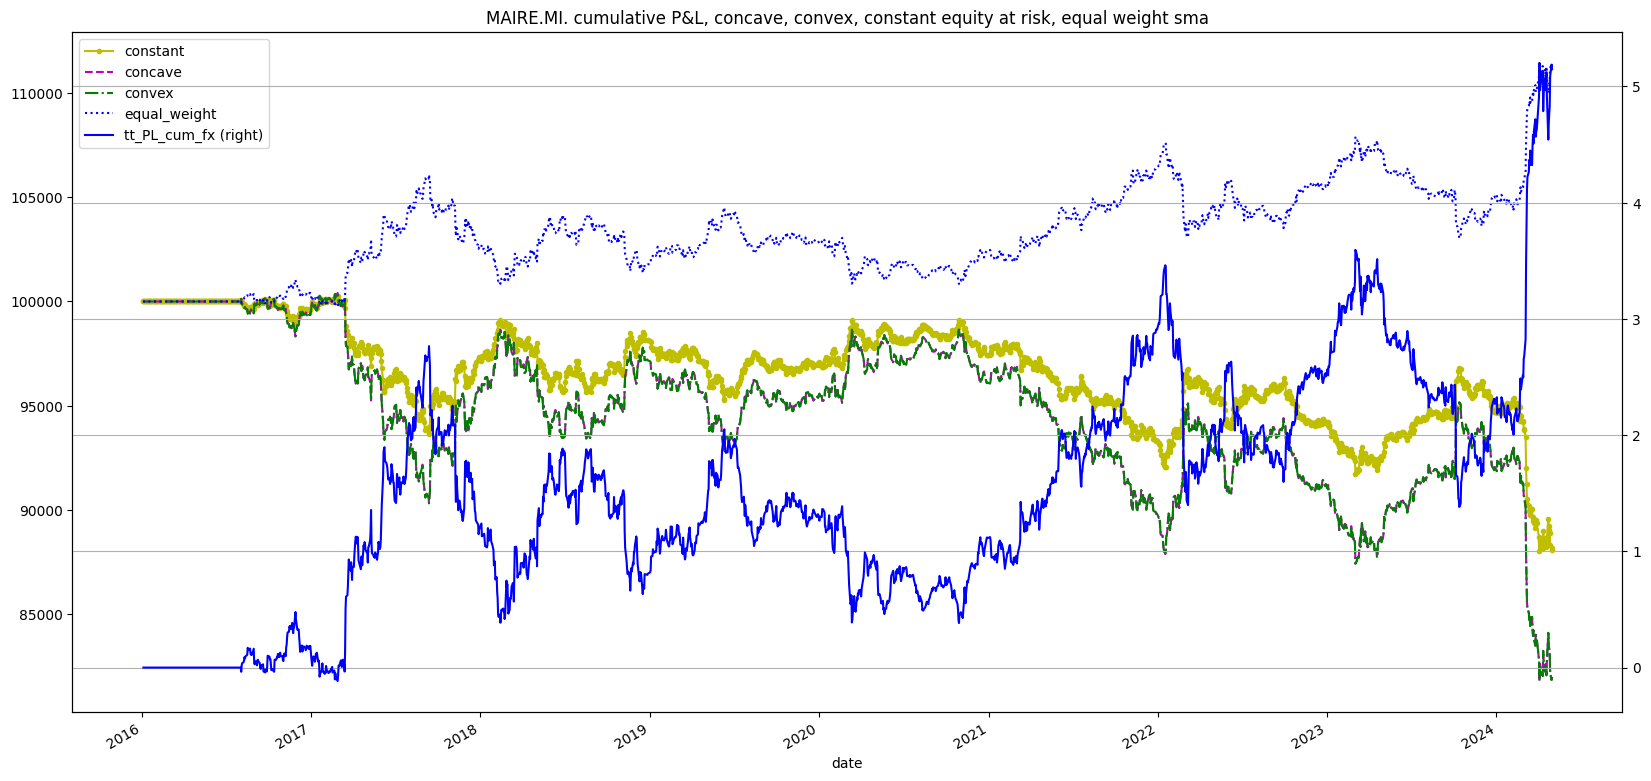

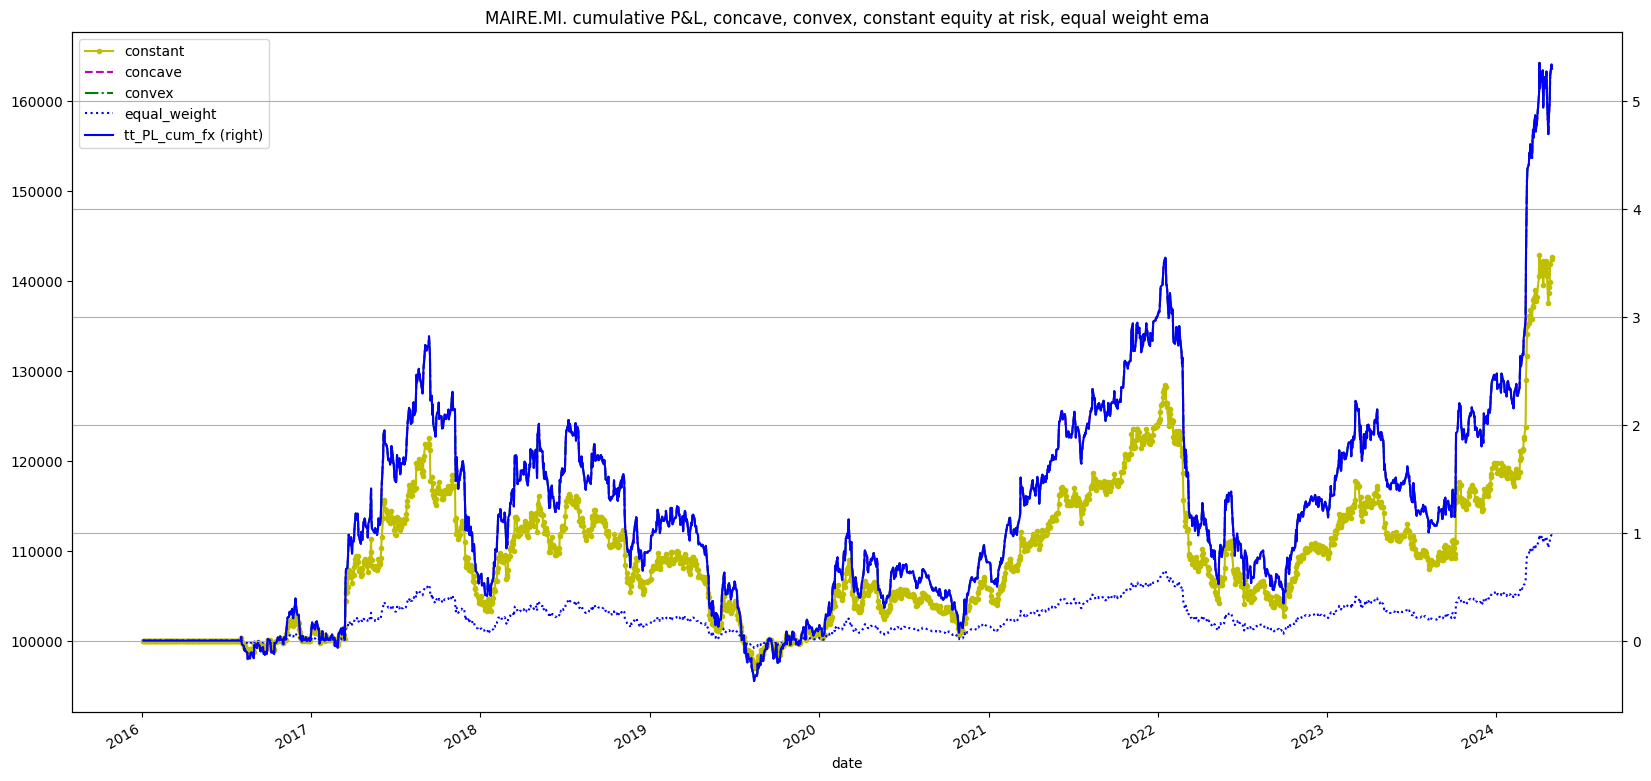

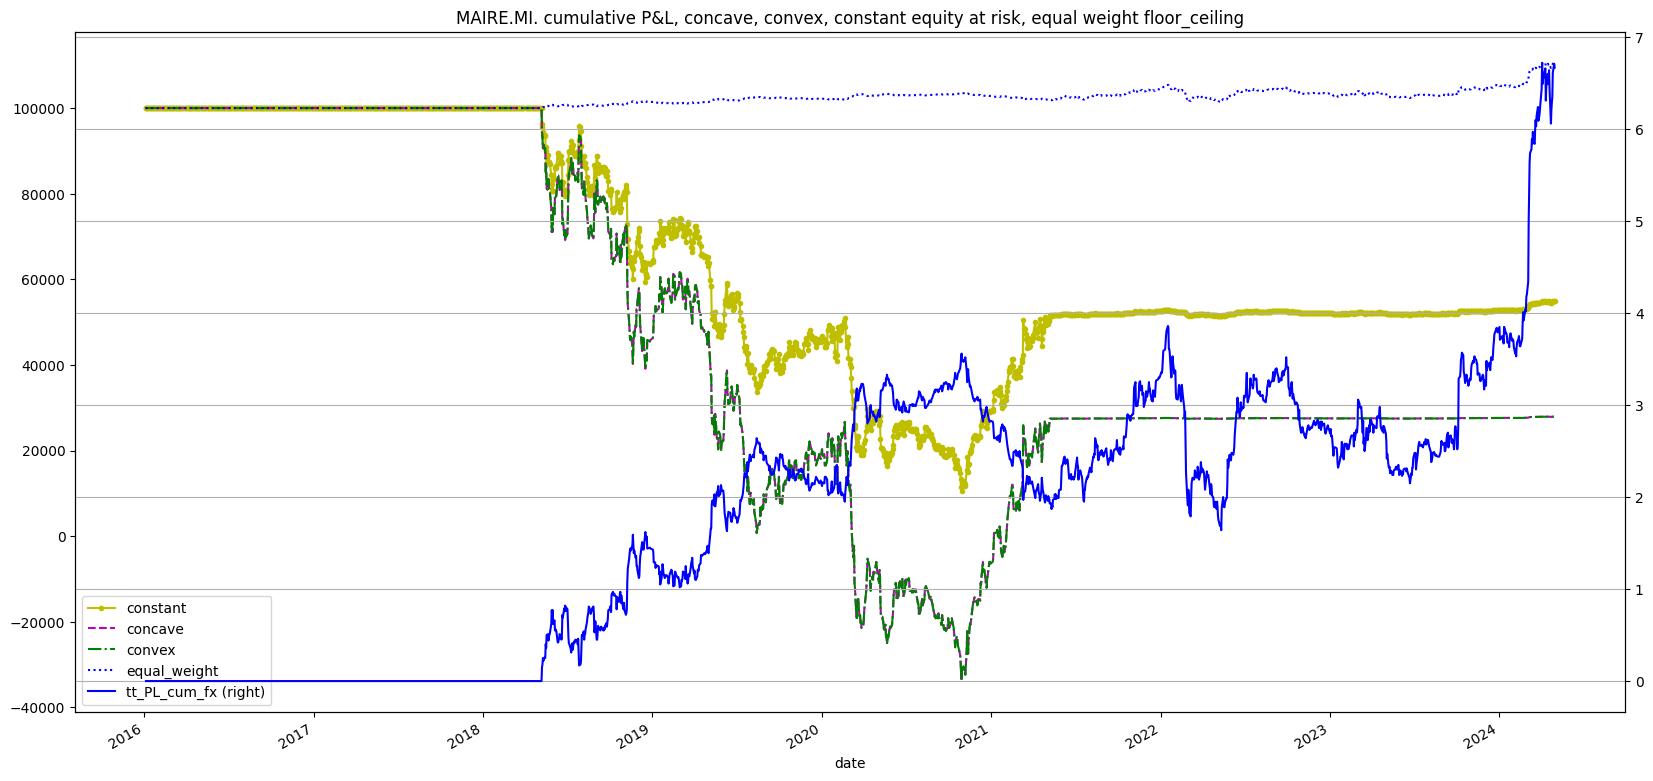

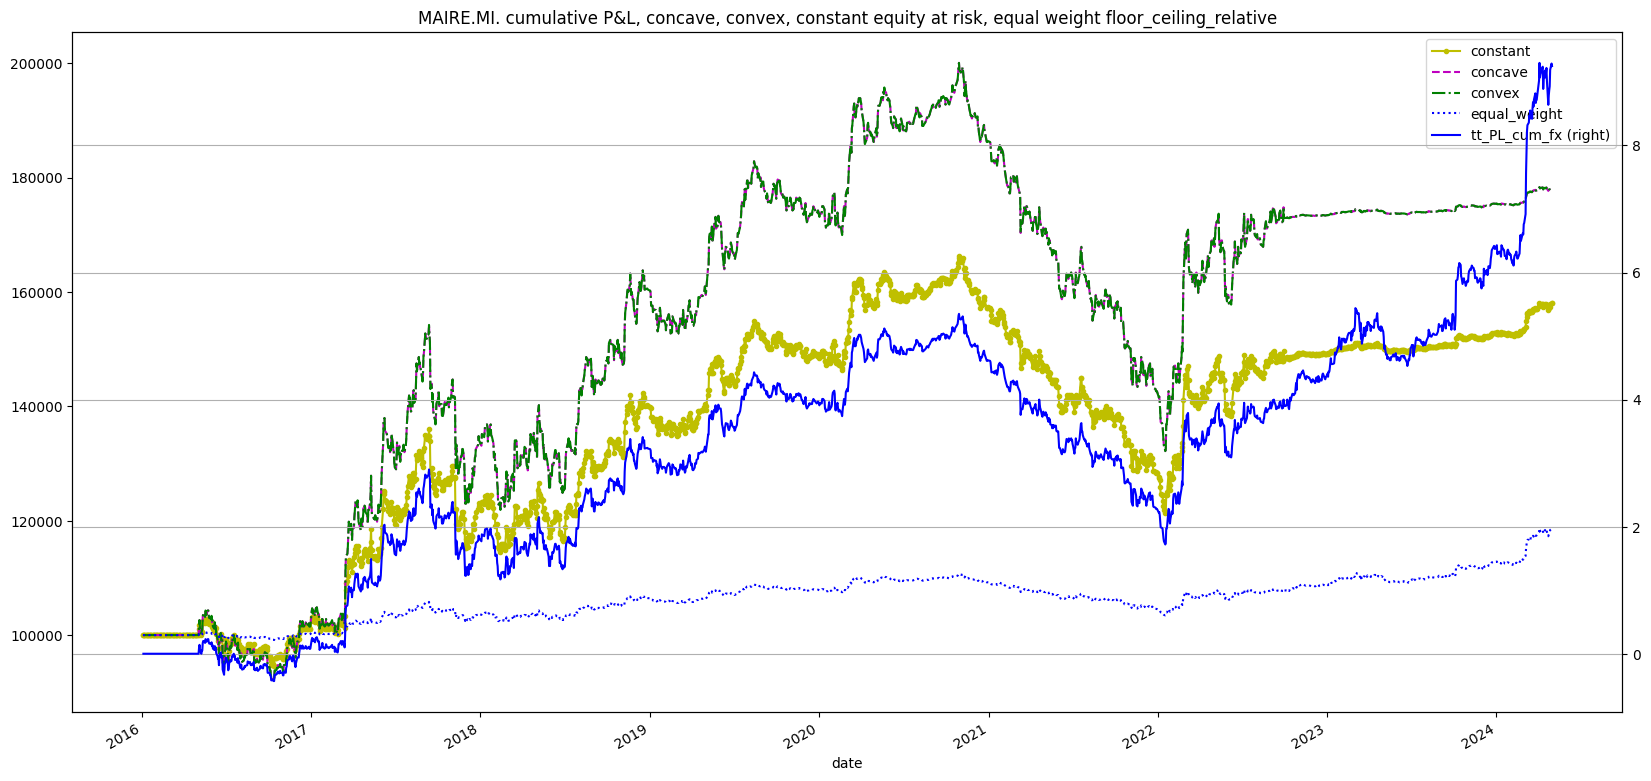

In [23]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [24]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                 -700.0   1700.0   2600.0   2600.0
ema                      -700.0   8000.0  12000.0  12000.0
floor_ceiling            -700.0    700.0    100.0    100.0
floor_ceiling_relative   -700.0   1800.0   1000.0   1000.0
sma                      -700.0  -2300.0  -3500.0  -3500.0
turtle                   -600.0   1300.0   1900.0   1300.0

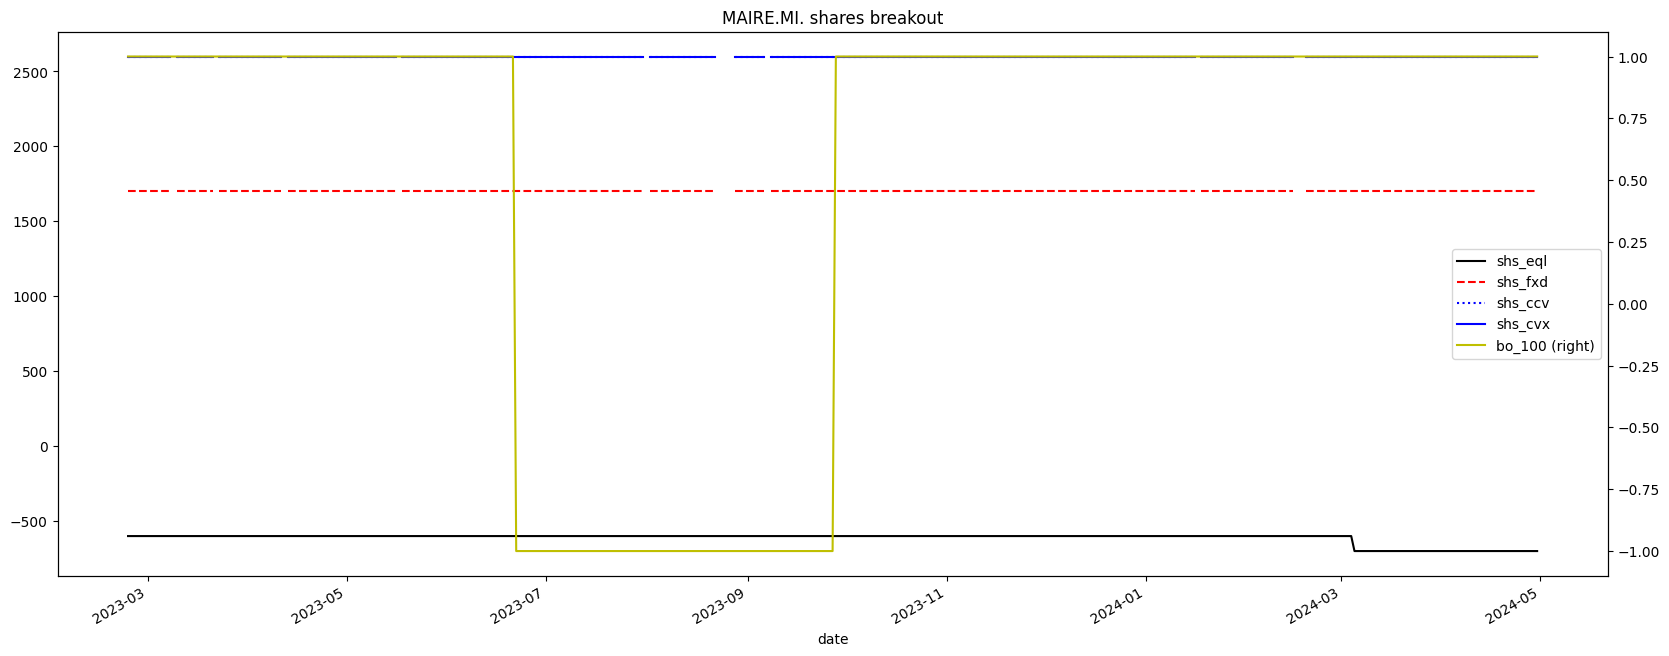

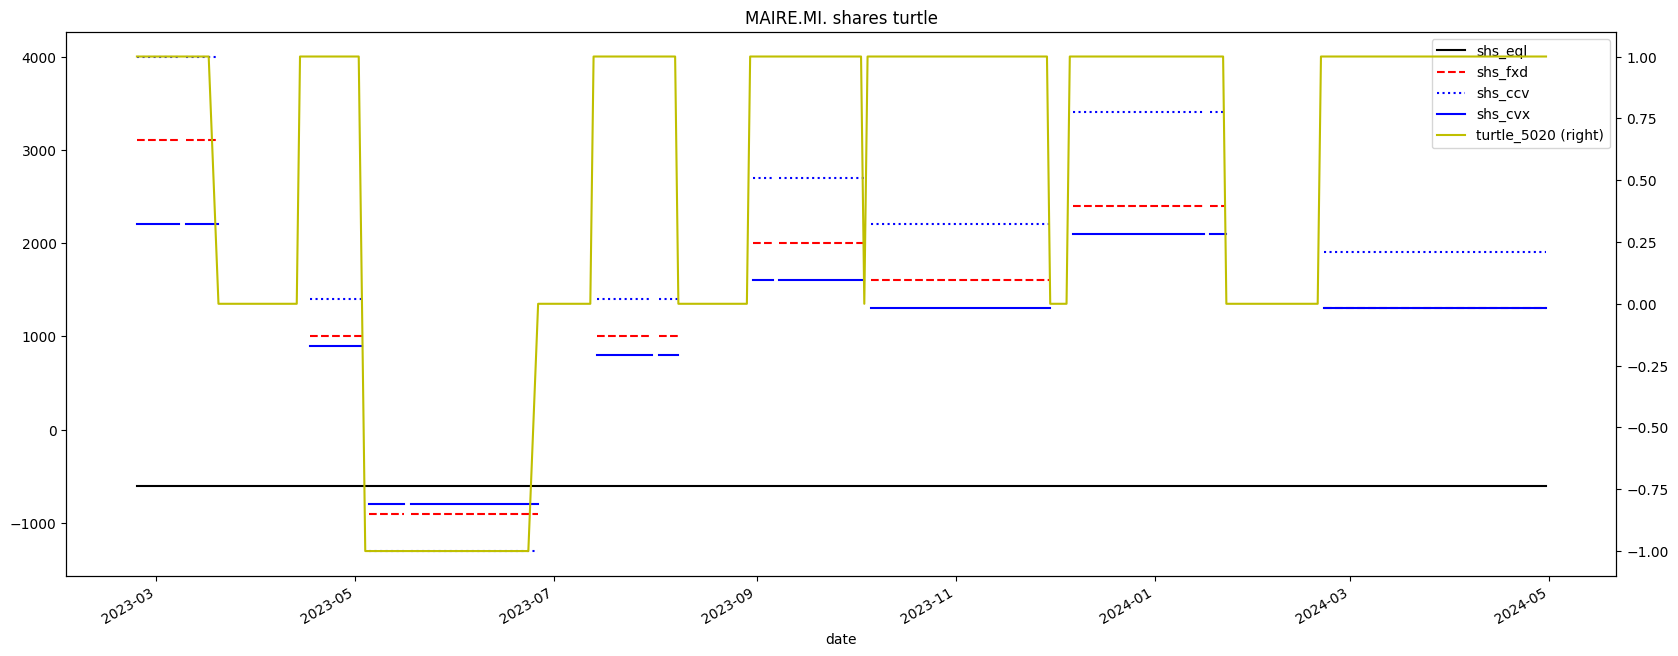

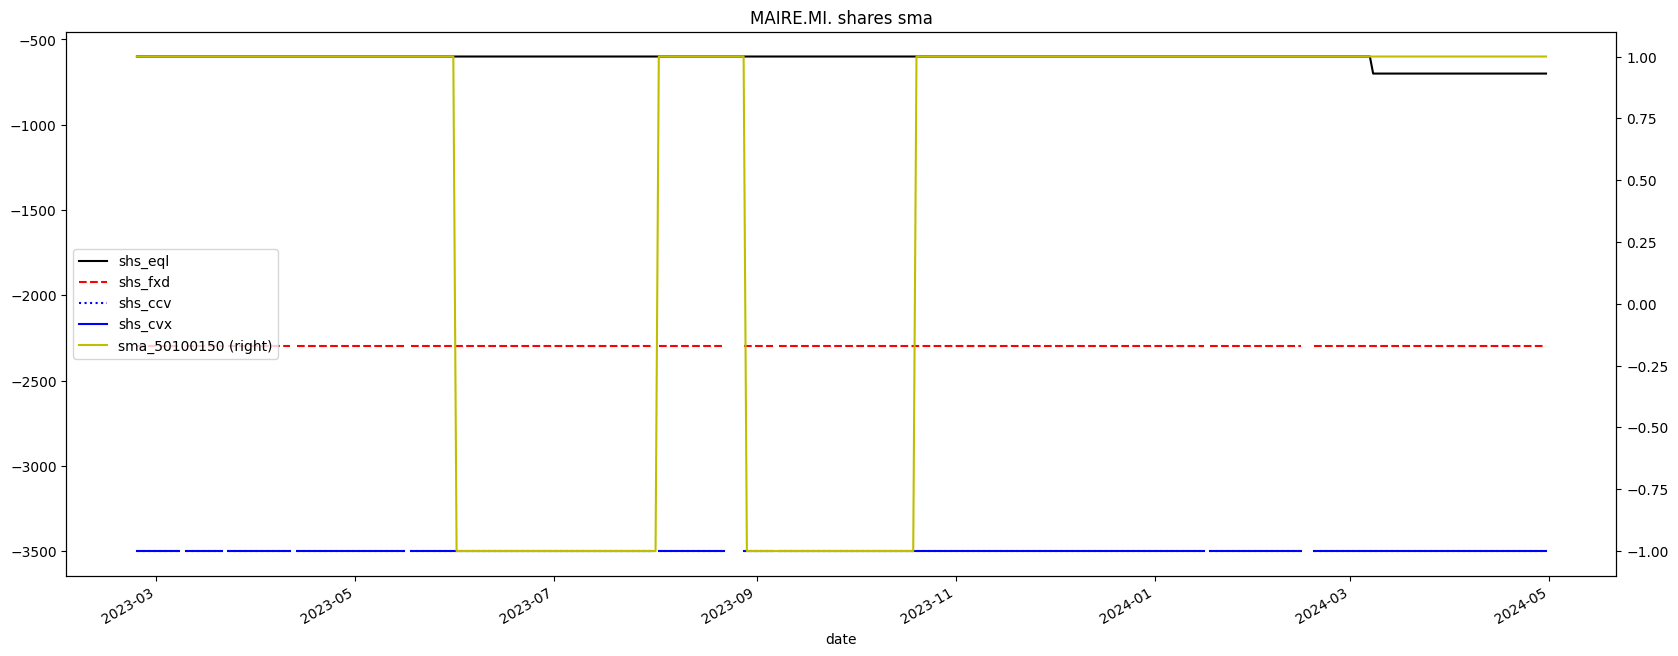

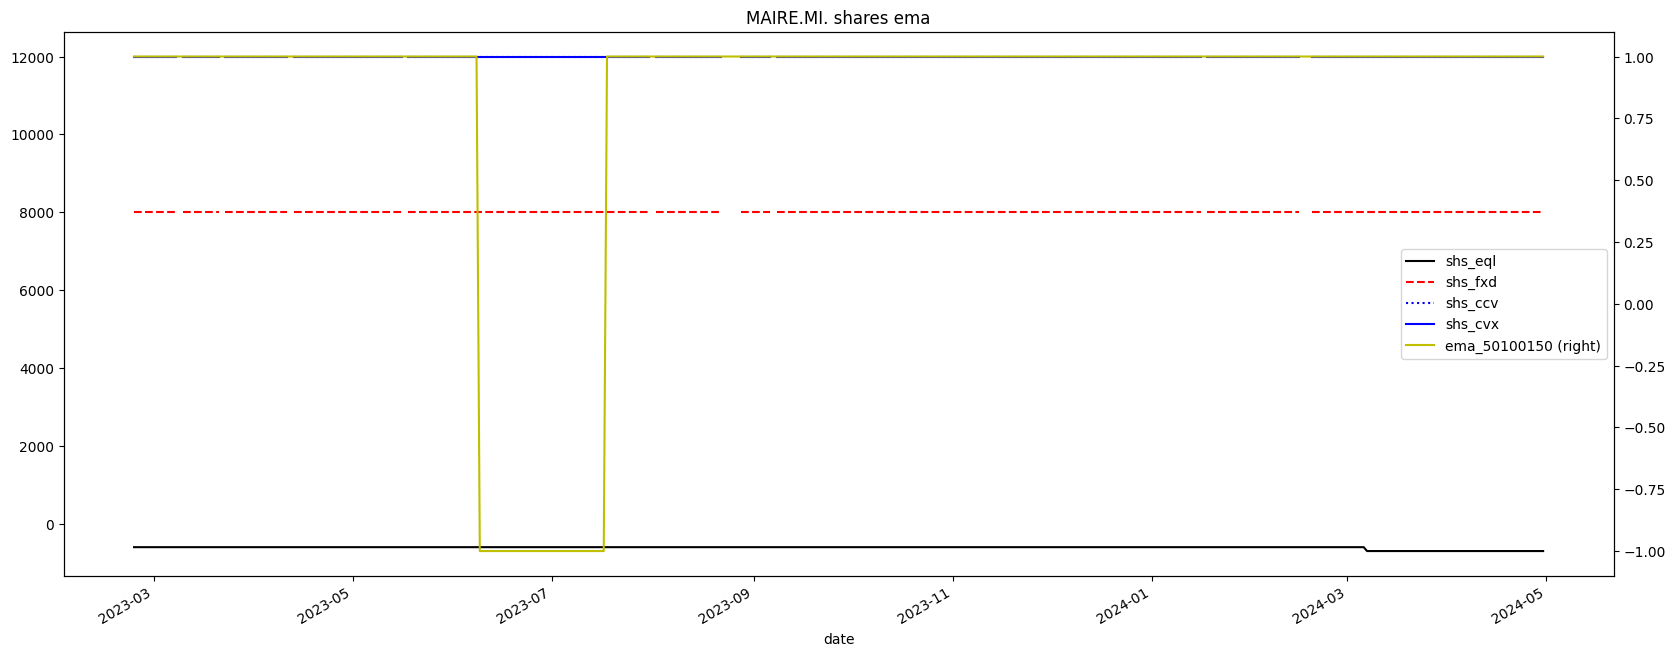

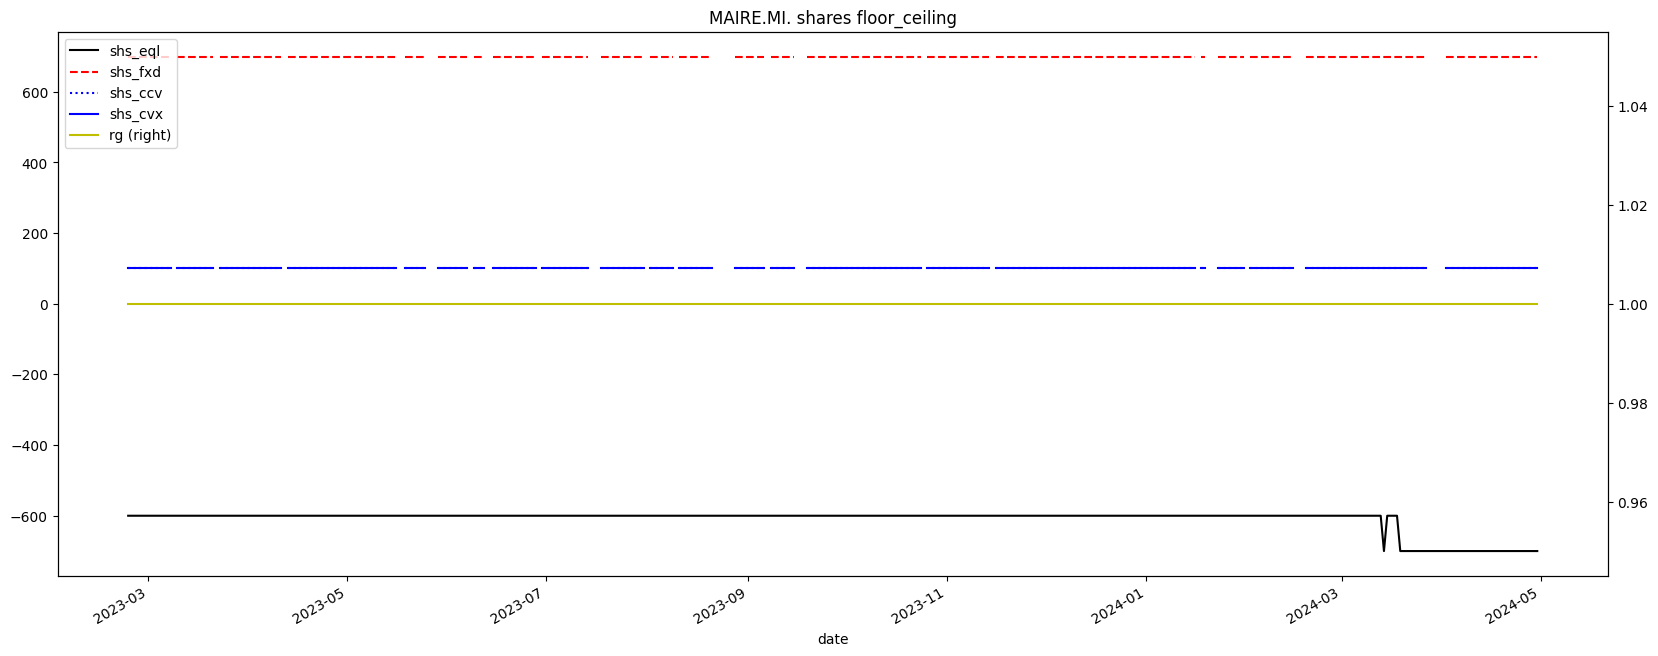

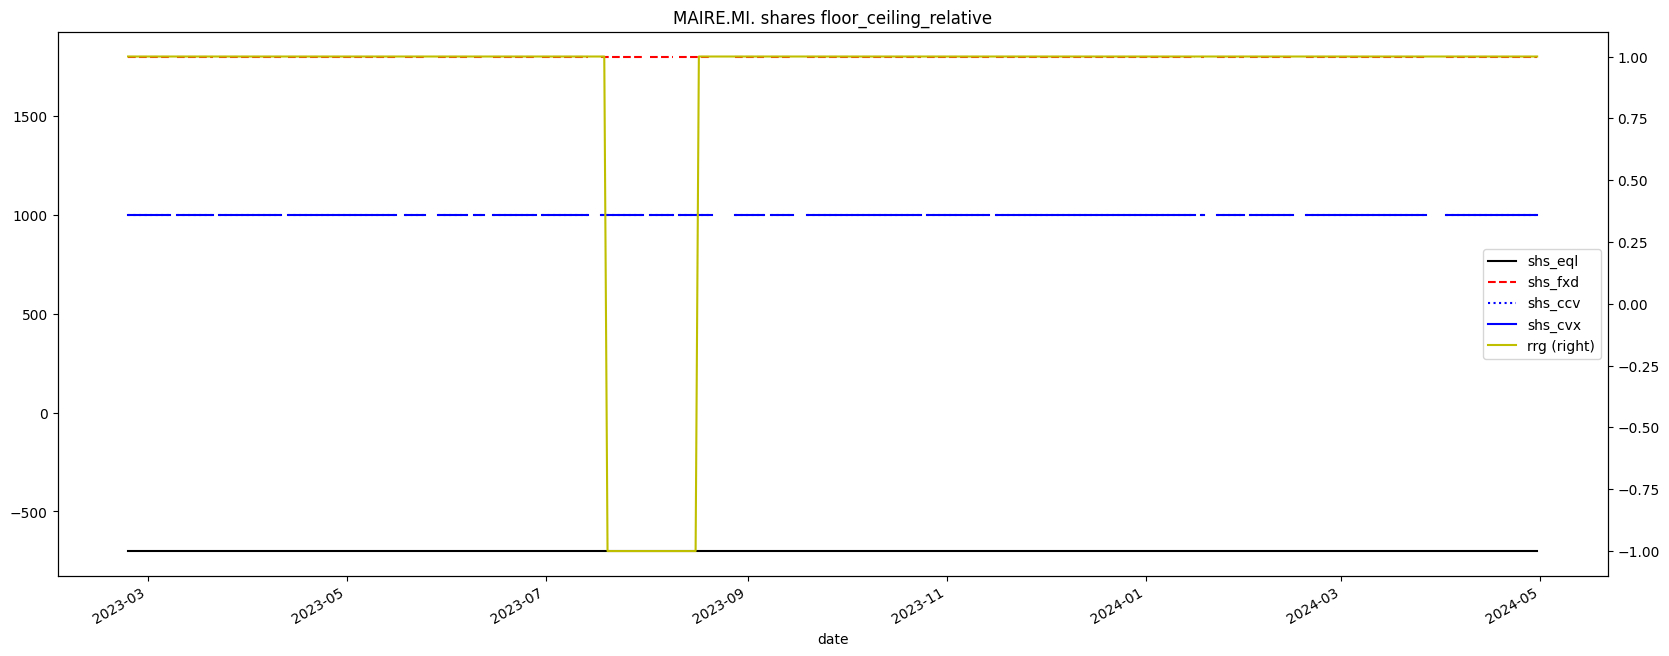

In [25]:
def plot_shares_signal(df, ticker, signal, m):
    df[['shs_eql','shs_fxd','shs_ccv','shs_cvx', signal]].plot(secondary_y=[signal],figsize=(20,8),style= ['k','r--','b:','b', 'y'],
                                                         title= str(ticker)+' shares ' + str(m))
    plt.show()
    
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_shares_signal(output_signals[i].tail(300), ticker, signal[i], method[i])
